In [364]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

#### Loading Excel File

In [367]:
file_path = "VantageScore DS Technical Assessment Data 2.xlsx"

data_dict = pd.read_excel(file_path, sheet_name="Data Dictionary")
credit_data = pd.read_excel(file_path, sheet_name="Credit Data")
demographic_data = pd.read_excel(file_path, sheet_name="Demographic Data")

# display first few rows
display(credit_data.head())
display(demographic_data.head())

,ID,CURRENT_STATUS_LOANX,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,...,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1,Current,0,2001-04-01,1,NaN,9,1,4341,10.3,...,0.0,0,0,3,100.0,1,0,16901,36500,18124
1,2,Current,0,1987-06-01,0,71.0,13,1,12315,24.2,...,0.0,0,0,6,95.0,1,0,99468,15000,94072
2,3,Current,0,2011-04-01,0,NaN,8,0,4599,19.1,...,0.0,0,0,0,100.0,0,0,11749,13800,10000
3,4,Current,0,2006-02-01,0,NaN,10,0,5468,78.1,...,0.0,0,0,3,100.0,0,0,36151,5000,44984
4,5,Current,0,2000-12-01,0,NaN,12,0,829,3.6,...,0.0,0,0,5,92.3,0,0,29674,9300,32332


,ID,emp_length,home_ownership,annual_inc,addr_state
0,1,10+ years,RENT,55000.0,NY
1,2,10+ years,MORTGAGE,90000.0,LA
2,3,6 years,MORTGAGE,59280.0,MI
3,4,10+ years,MORTGAGE,92000.0,WA
4,5,10+ years,MORTGAGE,57250.0,MD


#### Main consumer credit health categories in dataset

In [369]:
print(credit_data.columns)

Index(['ID', 'CURRENT_STATUS_LOANX', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal',
       'total_bal_il', 'max_bal_bc', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mort_acc',
       'num_accts_ever_120_pd', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies',
       'tax_liens', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object')


#### Checking for missing values

In [371]:
# missing credit values
print("Missing values in Credit Data:")
missing_credit = credit_data.isnull().sum()
missing_credit = missing_credit[missing_credit > 0] 
print(missing_credit)

Missing values in Credit Data:
mths_since_last_delinq         56069
revol_util                       121
mths_since_last_major_derog    77124
num_tl_120dpd_2m                2486
dtype: int64


In [372]:
# better understanding variables with missing values
missing_vars = ['mths_since_last_delinq', 'revol_util', 'mths_since_last_major_derog', 'num_tl_120dpd_2m']
credit_data[missing_vars].describe()

,mths_since_last_delinq,revol_util,mths_since_last_major_derog,num_tl_120dpd_2m
count,43931.000000,99879.000000,22876.000000,97514.0
mean,36.829187,44.328556,46.454756,0.0
std,21.810133,24.883297,21.805162,0.0
min,0.000000,0.000000,0.000000,0.0
25%,19.000000,24.700000,29.000000,0.0
50%,34.000000,42.400000,46.000000,0.0
75%,53.000000,62.700000,64.000000,0.0
max,160.000000,183.800000,162.000000,0.0


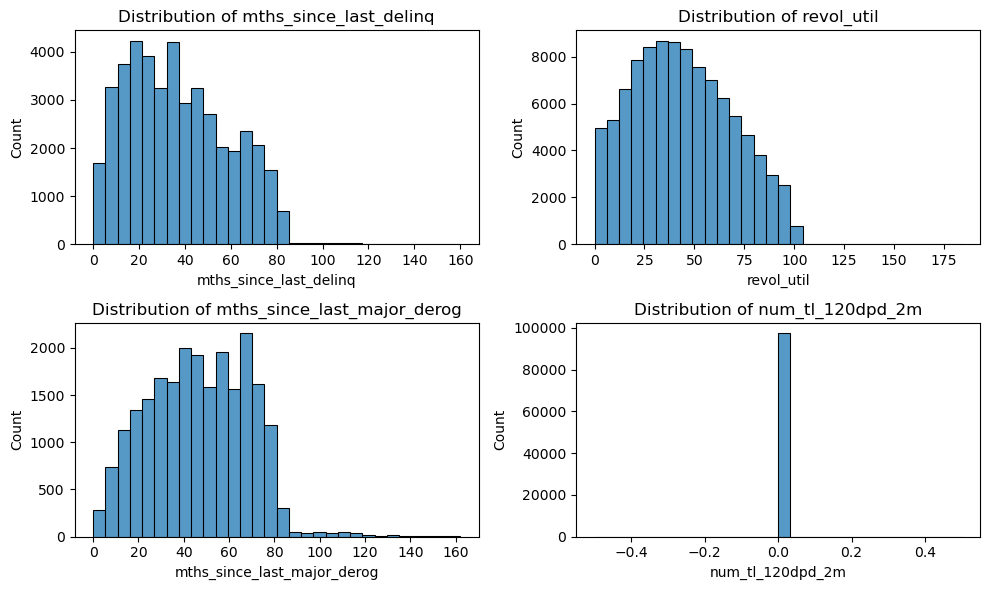

In [373]:
# understanding distribution of variables with missing values
fig, axes = plt.subplots(2, 2, figsize=(10, 6)) # 2x2 grid of plots
axes = axes.flatten()  
for i, var in enumerate(missing_vars):
    sns.histplot(credit_data[var], bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_xlabel(var)
plt.tight_layout()
plt.show()

In [374]:
# copy of dataset for showing how missing values would be handled
credit_data_cleaned = credit_data.copy()

# binary indicators
credit_data_cleaned['mths_since_last_delinq_missing'] = credit_data_cleaned['mths_since_last_delinq'].isna().astype(int)
credit_data_cleaned['mths_since_last_major_derog_missing'] = credit_data_cleaned['mths_since_last_major_derog'].isna().astype(int)

# max-based imputation
max_delinq = credit_data_cleaned['mths_since_last_delinq'].max()
max_major_derog = credit_data_cleaned['mths_since_last_major_derog'].max()

credit_data_cleaned['mths_since_last_delinq'].fillna(max_delinq + 1, inplace=True)
credit_data_cleaned['mths_since_last_major_derog'].fillna(max_major_derog + 1, inplace=True)

# median imputation bc skewed right and mean imputation can be affected by some outliers
credit_data_cleaned['revol_util'].fillna(credit_data_cleaned['revol_util'].median(), inplace=True)
# 0 imputation
credit_data_cleaned['num_tl_120dpd_2m'].fillna(0, inplace=True)

#### Noticeable trends in Credit Data

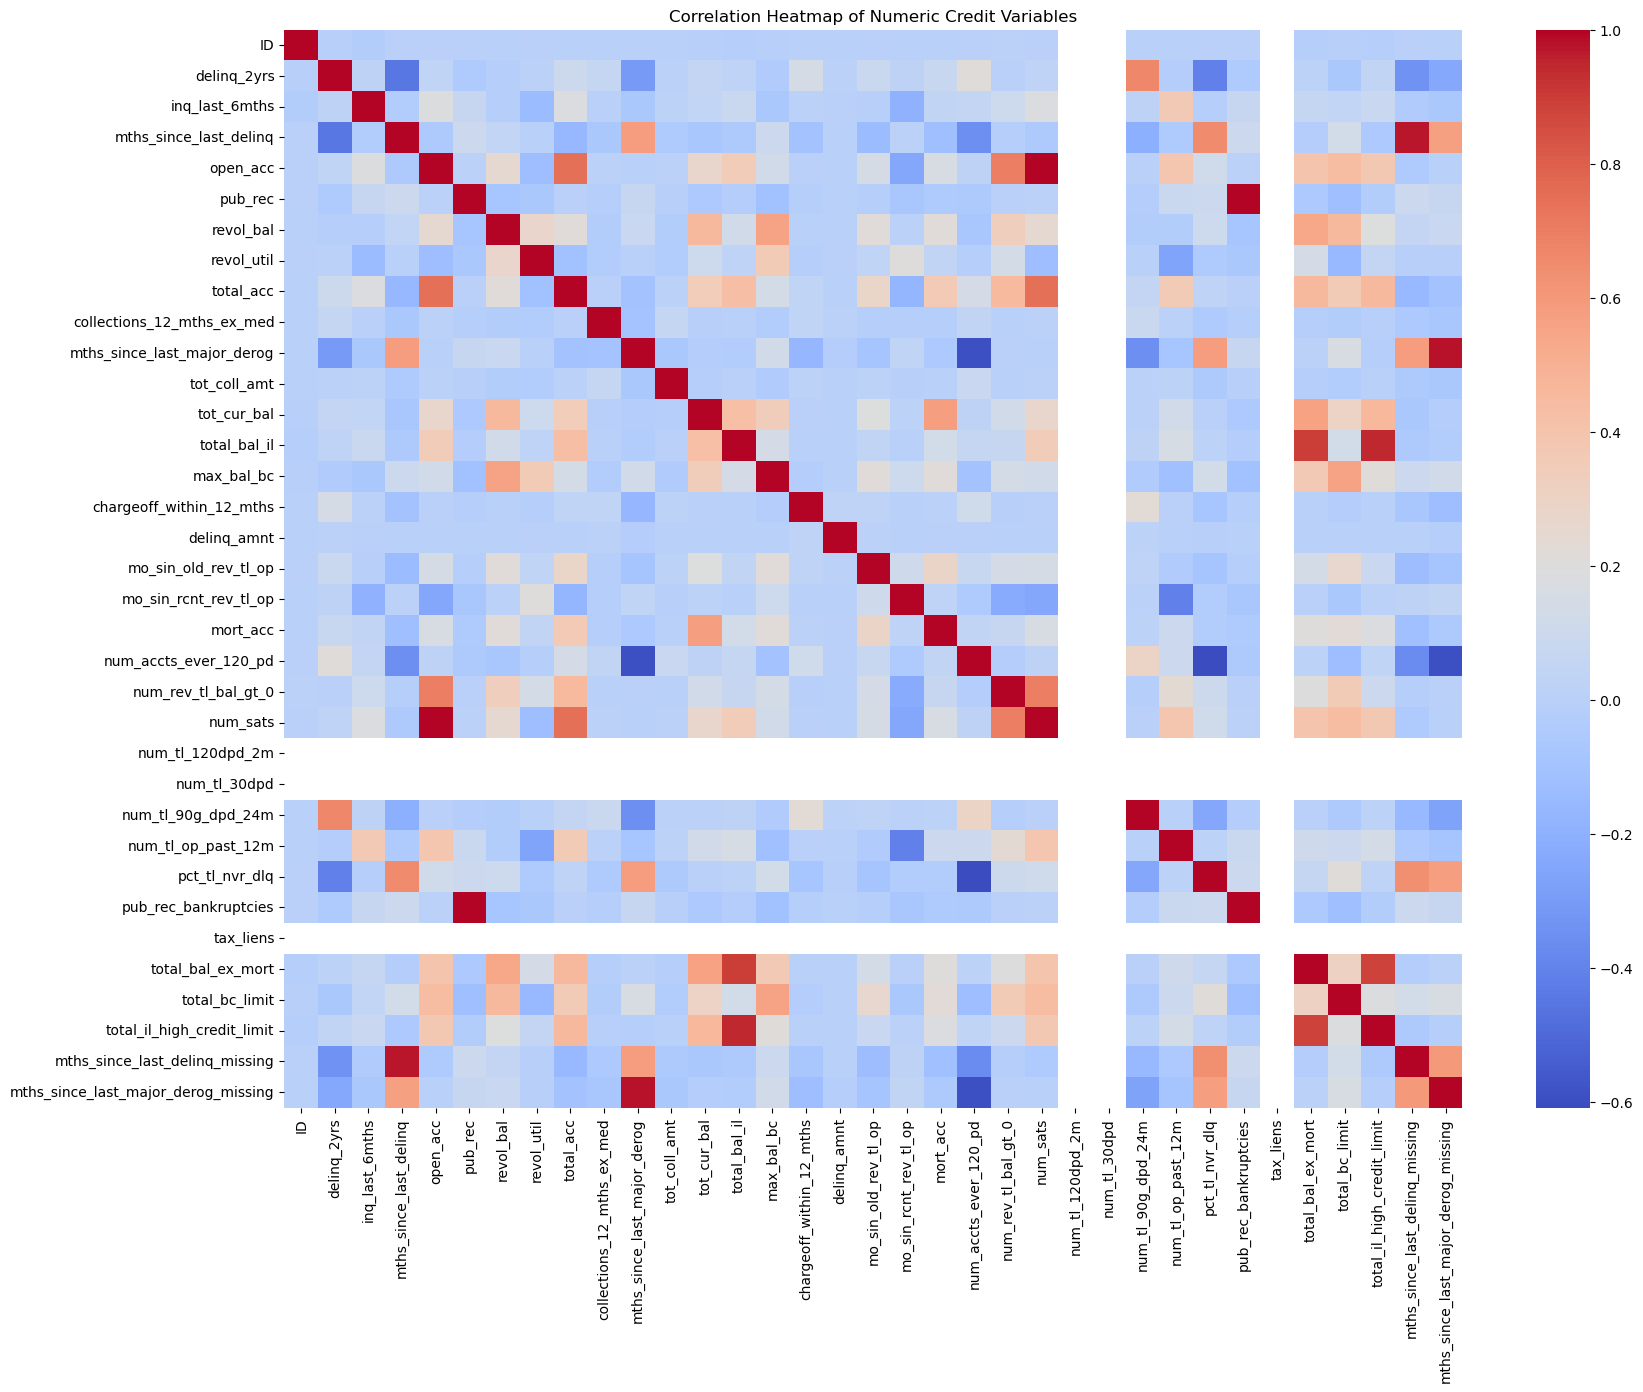

In [376]:
# numeric columns for heatmap 
heatmap_data = credit_data_cleaned.select_dtypes(include=['number'])  
plt.figure(figsize=(19,14))
sns.heatmap(heatmap_data.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Numeric Credit Variables")
plt.show()

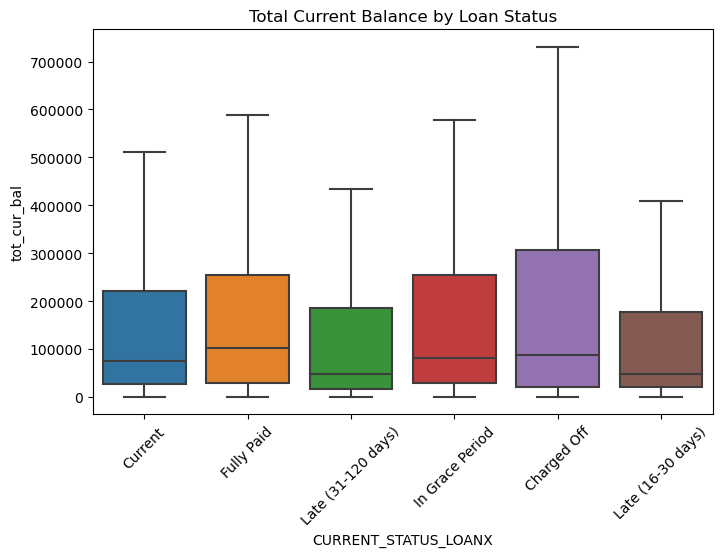

In [377]:
plt.figure(figsize=(8,5))
sns.boxplot(data=credit_data_cleaned, x='CURRENT_STATUS_LOANX', y='tot_cur_bal', showfliers=False)
plt.title("Total Current Balance by Loan Status")
plt.xticks(rotation=45)
plt.show()

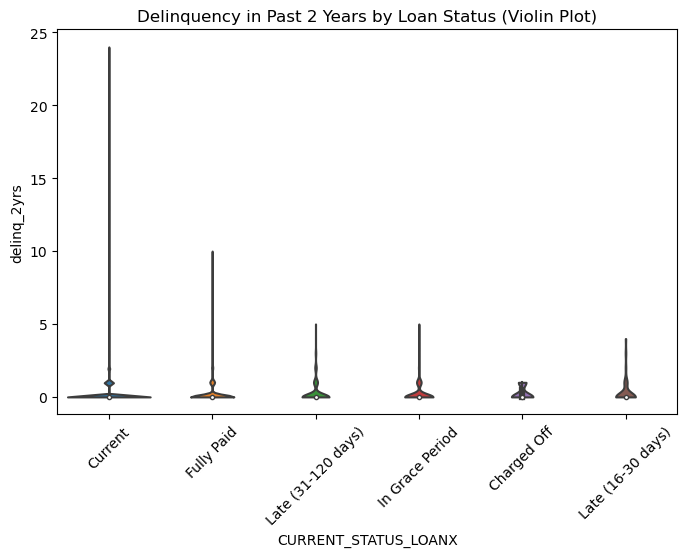

In [378]:
plt.figure(figsize=(8,5))
sns.violinplot(data=credit_data_cleaned, x='CURRENT_STATUS_LOANX', y='delinq_2yrs', cut=0)  # cut=0 prevents extending beyond observed values
plt.title("Delinquency in Past 2 Years by Loan Status (Violin Plot)")
plt.xticks(rotation=45)
plt.show()

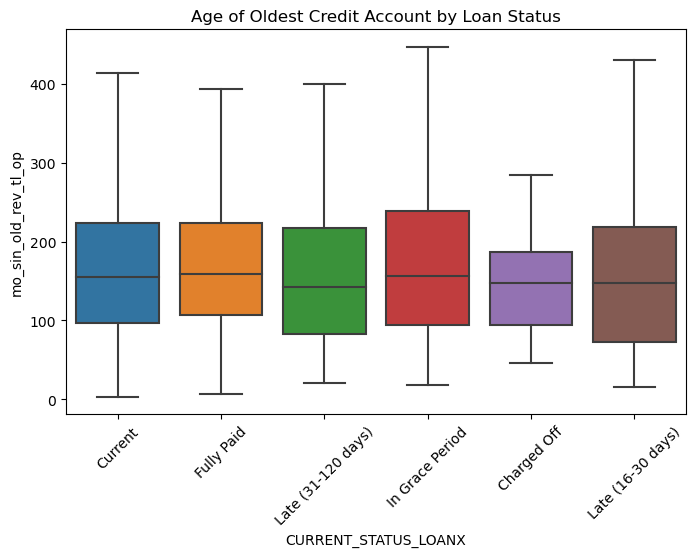

In [379]:
plt.figure(figsize=(8,5))
sns.boxplot(data=credit_data_cleaned, x='CURRENT_STATUS_LOANX', y='mo_sin_old_rev_tl_op', showfliers=False)
plt.title("Age of Oldest Credit Account by Loan Status")
plt.xticks(rotation=45)
plt.show()


#### Visualize current payment status of LOANX

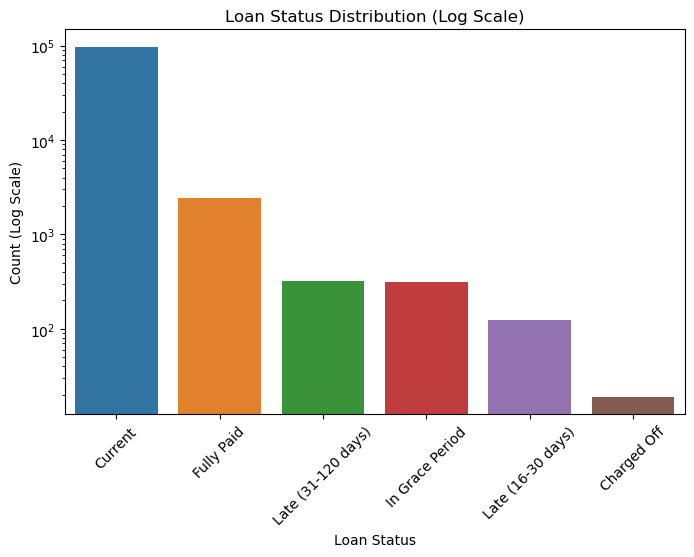

In [381]:
plt.figure(figsize=(8,5))
sns.countplot(data=credit_data_cleaned, x='CURRENT_STATUS_LOANX', order=credit_data_cleaned['CURRENT_STATUS_LOANX'].value_counts().index)
plt.title("Loan Status Distribution (Log Scale)")
plt.xlabel("Loan Status")
plt.ylabel("Count (Log Scale)")
plt.yscale("log") # used to provide detail to smaller numbers
plt.xticks(rotation=45)
plt.show()

In [382]:
loan_status_counts = credit_data_cleaned['CURRENT_STATUS_LOANX'].value_counts()
print(loan_status_counts)

CURRENT_STATUS_LOANX
Current               96793
Fully Paid             2431
Late (31-120 days)      318
In Grace Period         316
Late (16-30 days)       123
Charged Off              19
Name: count, dtype: int64


#### Demographic composition of borrowers

In [384]:
print(demographic_data[['emp_length', 'home_ownership', 'annual_inc']].describe(include='all'))

print("\nMissing Values")
print(demographic_data.isnull().sum())

       emp_length home_ownership    annual_inc
count       90773         100000  1.000000e+05
unique         11              4           NaN
top     10+ years       MORTGAGE           NaN
freq        30142          49453           NaN
mean          NaN            NaN  8.314996e+04
std           NaN            NaN  1.117613e+05
min           NaN            NaN  0.000000e+00
25%           NaN            NaN  4.784000e+04
50%           NaN            NaN  6.861300e+04
75%           NaN            NaN  1.000000e+05
max           NaN            NaN  9.757200e+06

Missing Values
ID                   0
emp_length        9227
home_ownership       0
annual_inc           0
addr_state           0
dtype: int64


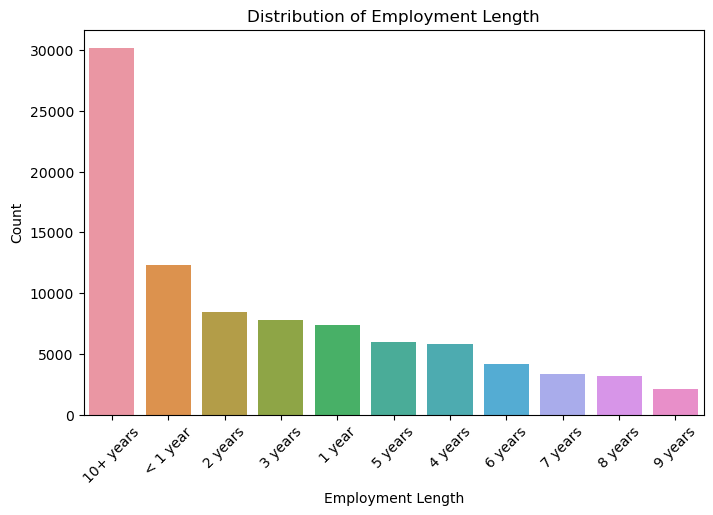

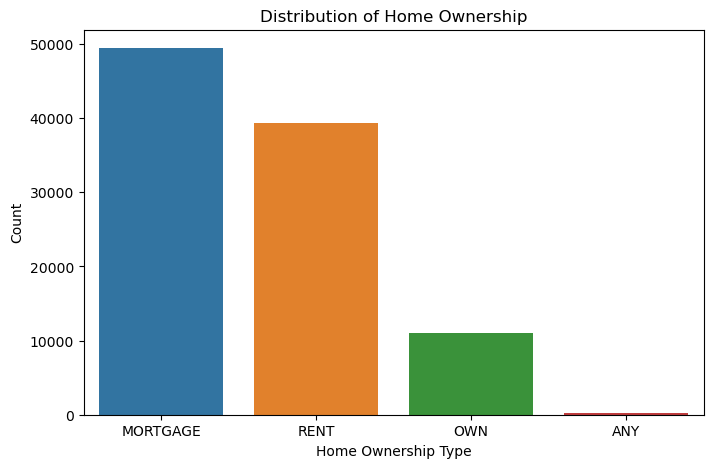

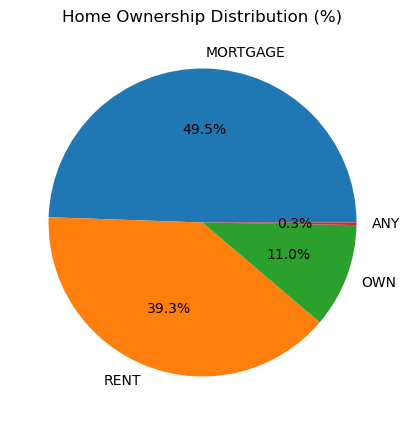

In [385]:
# employment length distribution
plt.figure(figsize=(8,5))
# display in descending order of freq.
# value counts excludes n/a, see below for count of "n/a" value
sns.countplot(data=demographic_data, x='emp_length', order=demographic_data['emp_length'].value_counts().index)
plt.title("Distribution of Employment Length")
plt.xlabel("Employment Length")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# home ownership distribution 
plt.figure(figsize=(8,5))
sns.countplot(data=demographic_data, x='home_ownership', order=demographic_data['home_ownership'].value_counts().index)
plt.title("Distribution of Home Ownership")
plt.xlabel("Home Ownership Type")
plt.ylabel("Count")
plt.show()

# home ownership percentage by pie chart
home_ownership_counts = demographic_data['home_ownership'].value_counts()
home_ownership_percentages = home_ownership_counts / home_ownership_counts.sum() * 100
plt.figure(figsize=(8, 5))
plt.pie(home_ownership_percentages, labels=home_ownership_percentages.index, autopct='%1.1f%%')
plt.title("Home Ownership Distribution (%)")
plt.show()

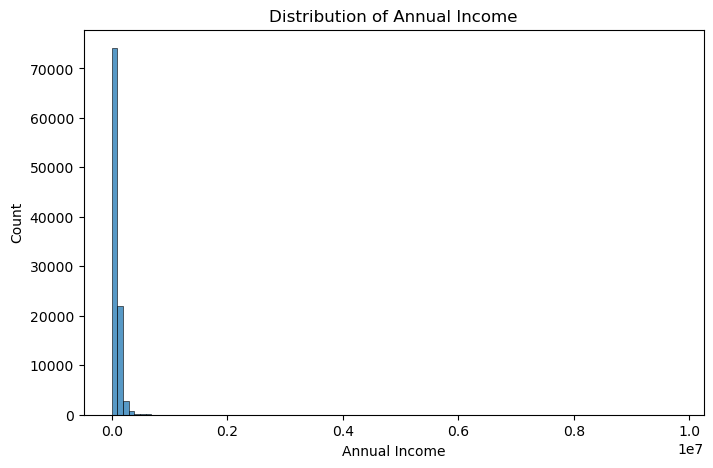

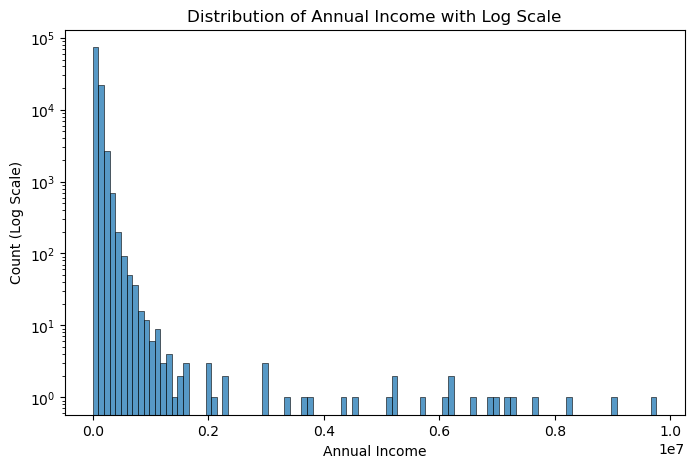

In [386]:
# annual income distribution without log scale
plt.figure(figsize=(8,5))
sns.histplot(demographic_data['annual_inc'], bins=100)
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income") 
plt.ylabel("Count")
plt.show()

# annual income distribution with log scale on y axis
plt.figure(figsize=(8,5))
sns.histplot(demographic_data['annual_inc'], bins=100)
plt.title("Distribution of Annual Income with Log Scale")
plt.xlabel("Annual Income") 
plt.yscale('log') # helps better visualize the distribution of values
plt.ylabel("Count (Log Scale)")
plt.show()

In [387]:
# understanding the variables better
print("Employment Length Value Counts (Including N/A)")
print(demographic_data['emp_length'].value_counts(dropna=False))

print('\n')

# confirming trends in annual income graph
print(demographic_data['annual_inc'].describe(percentiles=[0.10, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))
print("\nBorrowers earning above $1M:", (demographic_data['annual_inc'] > 1000000).sum())

Employment Length Value Counts (Including N/A)
emp_length
10+ years    30142
< 1 year     12317
NaN           9227
2 years       8431
3 years       7799
1 year        7351
5 years       6006
4 years       5801
6 years       4201
7 years       3383
8 years       3220
9 years       2122
Name: count, dtype: int64


count    1.000000e+05
mean     8.314996e+04
std      1.117613e+05
min      0.000000e+00
10%      3.350000e+04
25%      4.784000e+04
50%      6.861300e+04
75%      1.000000e+05
90%      1.400028e+05
95%      1.800000e+05
99%      3.000000e+05
max      9.757200e+06
Name: annual_inc, dtype: float64

Borrowers earning above $1M: 53


#### Geographical borrowers of 100,000 borrowers

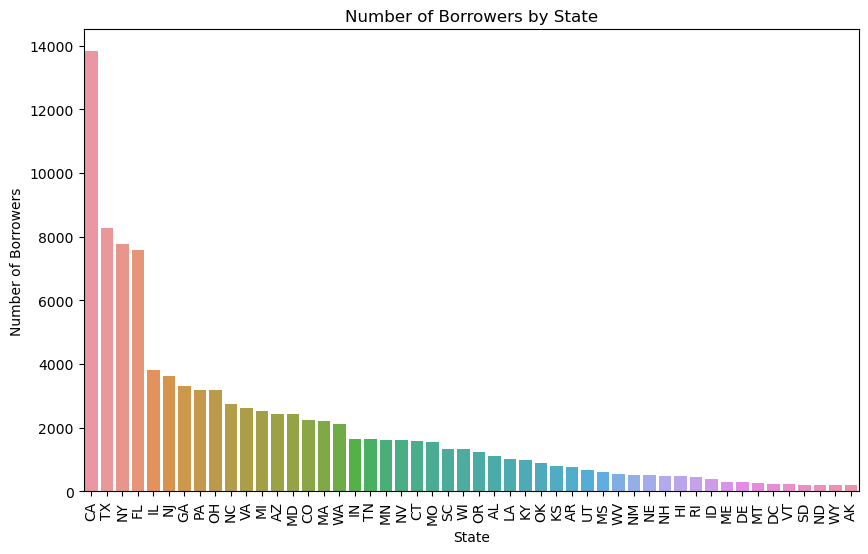

In [389]:
# bar chart
state_counts = demographic_data['addr_state'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.xticks(rotation=90)  # Rotate state labels for readability
plt.xlabel("State")
plt.ylabel("Number of Borrowers")
plt.title("Number of Borrowers by State")
plt.show()

# choropleth map. more of an interactive map
state_counts = demographic_data['addr_state'].value_counts().reset_index()
state_counts.columns = ['State', 'Borrower_Count']

fig = px.choropleth(state_counts, locations='State', locationmode="USA-states", color='Borrower_Count', color_continuous_scale="blues",
                     scope="usa",title="Geographical Distribution of Borrowers")
fig.show()

#### Aggregated Insights 

Measure 1: Reliance on revolving credit: (revol_bal / total_bal_ex_mort)

Measure 2: Negative credit events (last 12 months):

In [393]:
# check cases where total_bal_ex_mort is less than revol_bal
subset = credit_data_cleaned[(credit_data_cleaned['total_bal_ex_mort'] < credit_data_cleaned['revol_bal'])]
print(subset[['revol_bal', 'total_bal_ex_mort', 'total_bal_il', 'tot_cur_bal']])

# drop the above cases from the dataset (0.116% of dataset)
credit_data_cleaned["flag_inconsistent_balance"] = credit_data_cleaned["total_bal_ex_mort"] < credit_data_cleaned["revol_bal"]
# flagged cases
num_flagged = credit_data_cleaned["flag_inconsistent_balance"].sum()
print(f"Number of flagged rows: {num_flagged}")
# drop rows, credit_data_cleaned2 is the dataset without these 116 rows
credit_data_cleaned2 = credit_data_cleaned[~credit_data_cleaned["flag_inconsistent_balance"]].drop(columns=["flag_inconsistent_balance"])

       revol_bal  total_bal_ex_mort  total_bal_il  tot_cur_bal
220       145631              92505          8105       353087
1782       60533              50588         38055        98588
4174      101901              88003             0       225886
5924       79936              69806         16723       308862
7160       65588              43846         35507       300315
...          ...                ...           ...          ...
92082     157907             130263         77550       258989
92402      95595              19748         18275       230614
92791     117273              99870         37096       680048
94066     103879              64795         41559       247015
98403      84751              53614         23116       723526

[116 rows x 4 columns]
Number of flagged rows: 116


In [394]:
# computing reliance on revolving credit
credit_data_cleaned2['revolving_credit_reliance'] = credit_data_cleaned2.apply(lambda row: 0 if row['revol_bal'] == 0 and row['total_bal_ex_mort'] == 0 
                                                                               else row['revol_bal'] / row['total_bal_ex_mort'], axis=1)

# computing negative credit events over the last 12 months
credit_data_cleaned2['negative_credit_events'] = (credit_data_cleaned2['collections_12_mths_ex_med'] + 
                                                 credit_data_cleaned2['chargeoff_within_12_mths'] +
                                                 credit_data_cleaned2['num_tl_30dpd'] + credit_data_cleaned2['num_tl_120dpd_2m'])

In [395]:
# merge credit and demographic data on ID
merged_data = credit_data_cleaned2.merge(demographic_data, on="ID", how="inner")
merged_data['emp_length'].fillna('Unknown', inplace=True) # 9220 missing values for emp_length, make as "Unknown"
merged_data

,ID,CURRENT_STATUS_LOANX,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,...,total_bc_limit,total_il_high_credit_limit,mths_since_last_delinq_missing,mths_since_last_major_derog_missing,revolving_credit_reliance,negative_credit_events,emp_length,home_ownership,annual_inc,addr_state
0,1,Current,0,2001-04-01,1,161.0,9,1,4341,10.3,...,36500,18124,1,1,0.256849,0.0,10+ years,RENT,55000.0,NY
1,2,Current,0,1987-06-01,0,71.0,13,1,12315,24.2,...,15000,94072,0,1,0.123809,0.0,10+ years,MORTGAGE,90000.0,LA
2,3,Current,0,2011-04-01,0,161.0,8,0,4599,19.1,...,13800,10000,1,1,0.391438,0.0,6 years,MORTGAGE,59280.0,MI
3,4,Current,0,2006-02-01,0,161.0,10,0,5468,78.1,...,5000,44984,1,1,0.151254,0.0,10+ years,MORTGAGE,92000.0,WA
4,5,Current,0,2000-12-01,0,161.0,12,0,829,3.6,...,9300,32332,1,1,0.027937,0.0,10+ years,MORTGAGE,57250.0,MD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99879,99996,Current,0,2009-06-01,2,161.0,8,0,1445,14.7,...,5000,3500,1,1,0.429932,0.0,Unknown,RENT,19752.0,TN
99880,99997,Current,0,1999-01-01,0,161.0,17,0,10676,15.7,...,47100,91185,1,1,0.121714,0.0,3 years,MORTGAGE,98000.0,CA
99881,99998,Late (31-120 days),0,2005-08-01,0,49.0,11,0,7853,53.1,...,12100,38799,0,0,0.231318,0.0,6 years,RENT,42000.0,CA
99882,99999,Current,0,1997-07-01,1,37.0,17,0,17078,28.9,...,36100,32674,0,1,0.349723,0.0,10+ years,MORTGAGE,80000.0,KY


#### Employment length

In [397]:
# skewness and kurtosis for each employment length category
# helps choose metric to visualize
skewness = merged_data.groupby('emp_length')[['negative_credit_events', 'revolving_credit_reliance']].apply(lambda x: x.skew())
kurt = merged_data.groupby('emp_length')[['negative_credit_events', 'revolving_credit_reliance']].apply(lambda x: x.kurtosis())
print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurt)

Skewness:
             negative_credit_events  revolving_credit_reliance
emp_length                                                   
1 year                    8.489612                   0.777614
10+ years                 8.939568                   0.613679
2 years                   8.991023                   0.814648
3 years                   8.398115                   0.855204
4 years                   7.070975                   0.871660
5 years                   8.189210                   0.799076
6 years                   9.644988                   0.793498
7 years                   7.425152                   0.773239
8 years                  12.282646                   0.737574
9 years                   9.224045                   0.673953
< 1 year                 12.575049                   0.568942
Unknown                  12.537075                   0.082991

Kurtosis:
             negative_credit_events  revolving_credit_reliance
emp_length                                     

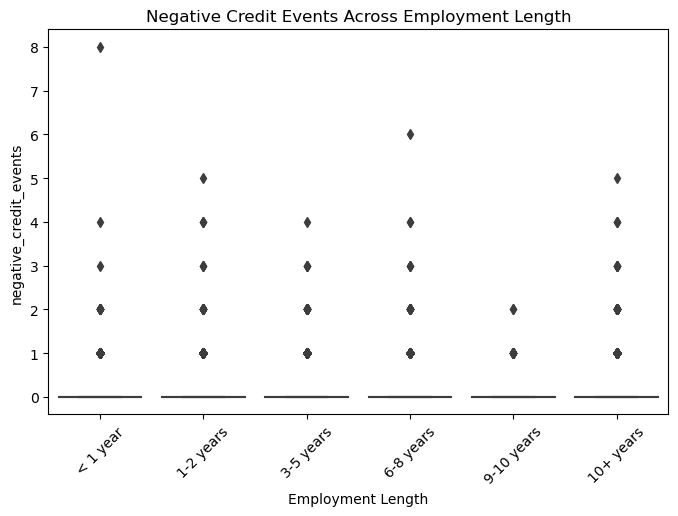

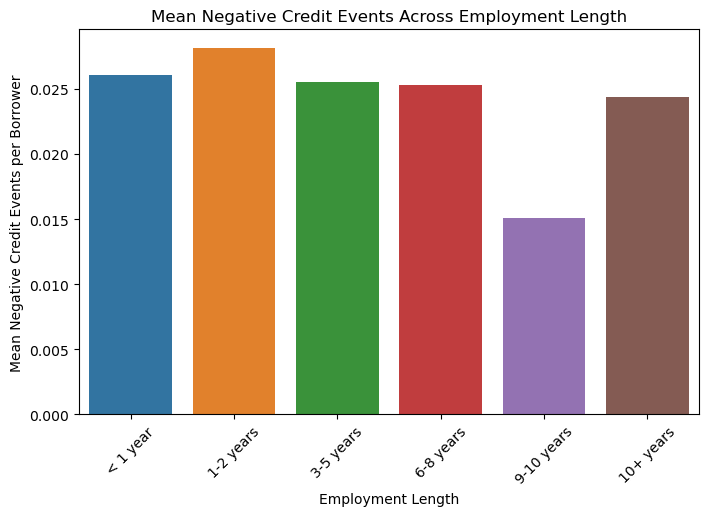

In [398]:
# employment bins
employment_bins = {
    '< 1 year': '< 1 year',
    '1 year': '1-2 years', '2 years': '1-2 years',
    '3 years': '3-5 years', '4 years': '3-5 years', '5 years': '3-5 years',
    '6 years': '6-8 years', '7 years': '6-8 years', '8 years': '6-8 years',
    '9 years': '9-10 years', '10+ years': '10+ years', 'Unknown': 'Unknown'
}

# categorization
merged_data['emp_length_binned'] = merged_data['emp_length'].map(employment_bins)

# fixed order for the new employment length categories
employment_order = ['< 1 year', '1-2 years', '3-5 years', '6-8 years', '9-10 years', '10+ years']

# boxplot of negative credit events
plt.figure(figsize=(8, 5))
sns.boxplot(x=merged_data['emp_length_binned'], y=merged_data['negative_credit_events'], order=employment_order)
plt.title('Negative Credit Events Across Employment Length')
plt.xlabel('Employment Length')
plt.xticks(rotation=45)
plt.show()

# mean negative credit events
mean_negative_credit = merged_data.groupby('emp_length_binned')['negative_credit_events'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=employment_order, y=[mean_negative_credit[emp] for emp in employment_order])
plt.title('Mean Negative Credit Events Across Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Mean Negative Credit Events per Borrower')
plt.xticks(rotation=45)
plt.show()

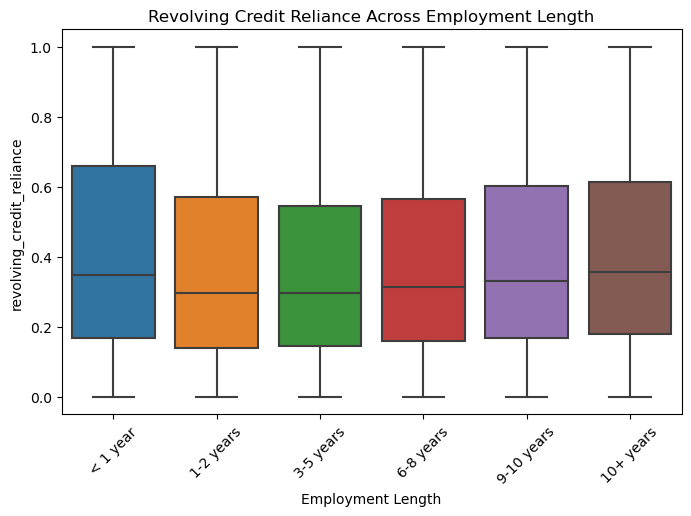

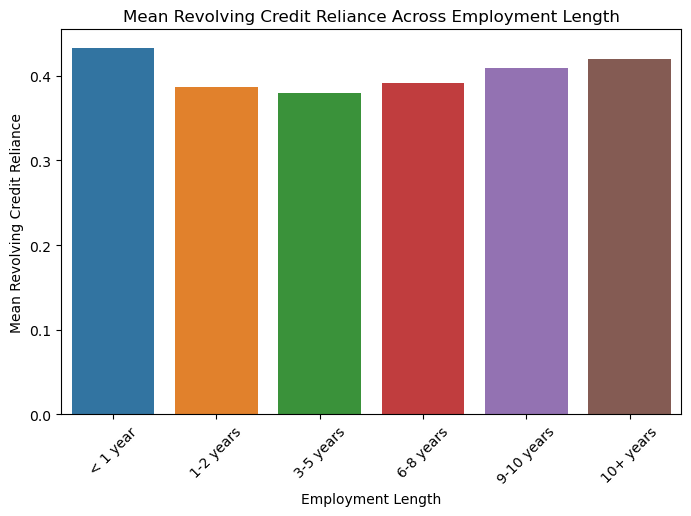

In [399]:
# revolving credit reliance
plt.figure(figsize=(8, 5))
sns.boxplot(x=merged_data['emp_length_binned'], y=merged_data['revolving_credit_reliance'], order=employment_order)
plt.title('Revolving Credit Reliance Across Employment Length')
plt.xlabel('Employment Length')
plt.xticks(rotation=45)
plt.show()

# mean revolving credit reliance
mean_revolving_credit = merged_data.groupby('emp_length_binned')['revolving_credit_reliance'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=employment_order, y=[mean_revolving_credit[emp] for emp in employment_order])
plt.title('Mean Revolving Credit Reliance Across Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Mean Revolving Credit Reliance')
plt.xticks(rotation=45)
plt.show()

In [400]:
summary_stats = merged_data.groupby('emp_length_binned')[['negative_credit_events', 'revolving_credit_reliance']].describe()
print(summary_stats)

                  negative_credit_events                                     \
                                   count      mean       std  min  25%  50%   
emp_length_binned                                                             
1-2 years                        15766.0  0.028162  0.185332  0.0  0.0  0.0   
10+ years                        30095.0  0.024356  0.173236  0.0  0.0  0.0   
3-5 years                        19592.0  0.025521  0.174308  0.0  0.0  0.0   
6-8 years                        10788.0  0.025306  0.188698  0.0  0.0  0.0   
9-10 years                        2119.0  0.015101  0.129495  0.0  0.0  0.0   
< 1 year                         12304.0  0.026089  0.184902  0.0  0.0  0.0   
Unknown                           9220.0  0.024729  0.184072  0.0  0.0  0.0   

                            revolving_credit_reliance                      \
                   75%  max                     count      mean       std   
emp_length_binned                                      

#### Home ownership

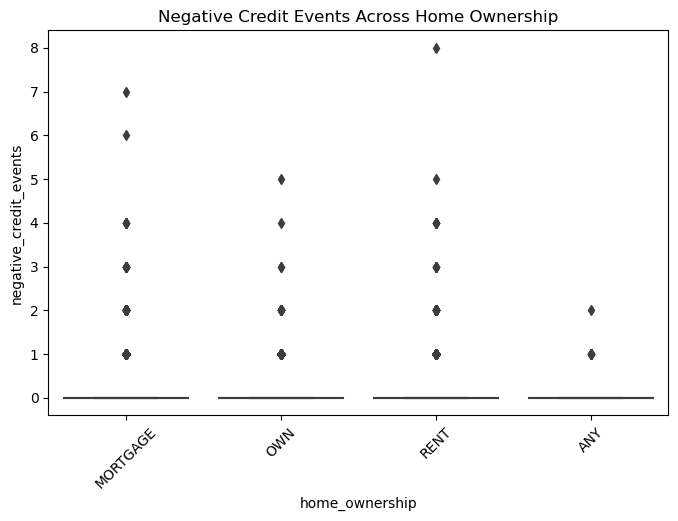

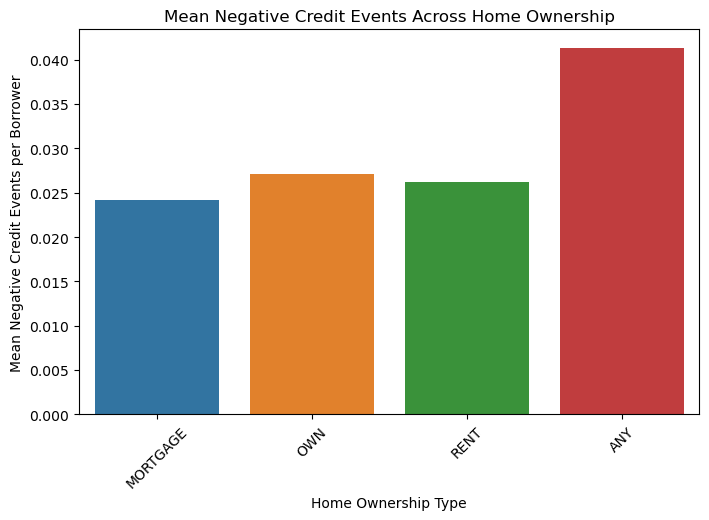

In [402]:
# fixed order for home ownership categories
home_ownership_order = ['MORTGAGE', 'OWN', 'RENT', 'ANY']

# boxplot of negative credit events across home ownership
plt.figure(figsize=(8, 5))
sns.boxplot(x=merged_data['home_ownership'], y=merged_data['negative_credit_events'], order=home_ownership_order)
plt.title('Negative Credit Events Across Home Ownership')
plt.xticks(rotation=45)
plt.show()

# mean negative credit events per home ownership category
mean_negative_credit_home = merged_data.groupby('home_ownership')['negative_credit_events'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=home_ownership_order, y=[mean_negative_credit_home[home] for home in home_ownership_order])
plt.title('Mean Negative Credit Events Across Home Ownership')
plt.xlabel('Home Ownership Type')
plt.ylabel('Mean Negative Credit Events per Borrower')
plt.xticks(rotation=45)
plt.show()

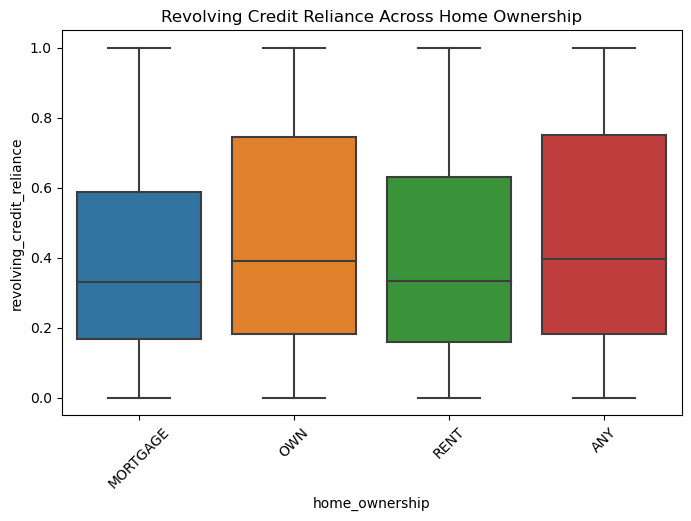

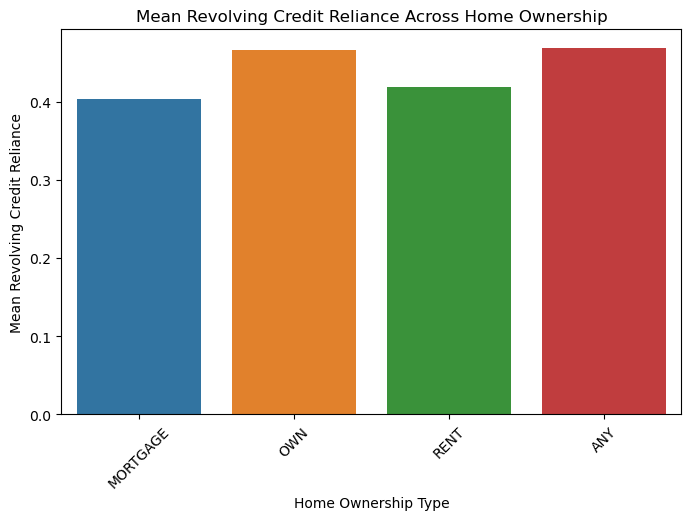

In [403]:
# boxplot of revolving credit reliance across home ownership
plt.figure(figsize=(8, 5))
sns.boxplot(x=merged_data['home_ownership'], y=merged_data['revolving_credit_reliance'], order=home_ownership_order)
plt.title('Revolving Credit Reliance Across Home Ownership')
plt.xticks(rotation=45)
plt.show()

# mean revolving credit reliance per home ownership category
mean_revolving_credit_home = merged_data.groupby('home_ownership')['revolving_credit_reliance'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=home_ownership_order, y=[mean_revolving_credit_home[home] for home in home_ownership_order])
plt.title('Mean Revolving Credit Reliance Across Home Ownership')
plt.xlabel('Home Ownership Type')
plt.ylabel('Mean Revolving Credit Reliance')
plt.xticks(rotation=45)
plt.show()

In [404]:
# compute summary statistics for additional insights
summary_stats_home = merged_data.groupby('home_ownership')[['negative_credit_events', 'revolving_credit_reliance']].describe()
print(summary_stats_home)

               negative_credit_events                                          \
                                count      mean       std  min  25%  50%  75%   
home_ownership                                                                  
ANY                             266.0  0.041353  0.217578  0.0  0.0  0.0  0.0   
MORTGAGE                      49357.0  0.024130  0.176885  0.0  0.0  0.0  0.0   
OWN                           10948.0  0.027128  0.183085  0.0  0.0  0.0  0.0   
RENT                          39313.0  0.026251  0.179661  0.0  0.0  0.0  0.0   

                    revolving_credit_reliance                           \
                max                     count      mean       std  min   
home_ownership                                                           
ANY             2.0                     266.0  0.469082  0.336251  0.0   
MORTGAGE        7.0                   49357.0  0.403314  0.292946  0.0   
OWN             5.0                   10948.0  0.466618  0.330

#### Annual income

income_group
Middle Income    74818
Low Income       23494
High Income       1572
Name: count, dtype: int64


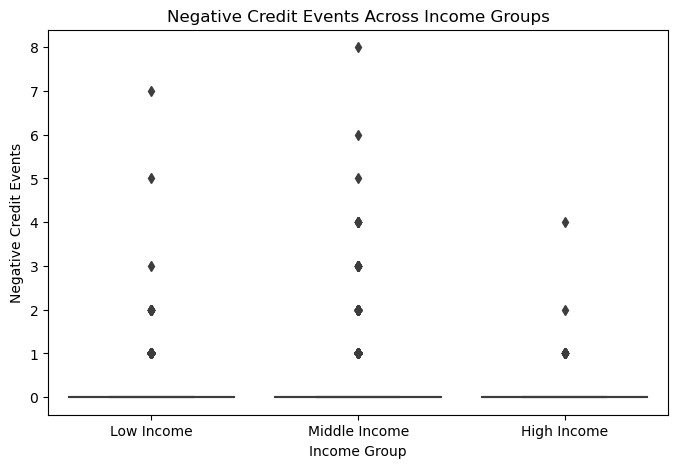

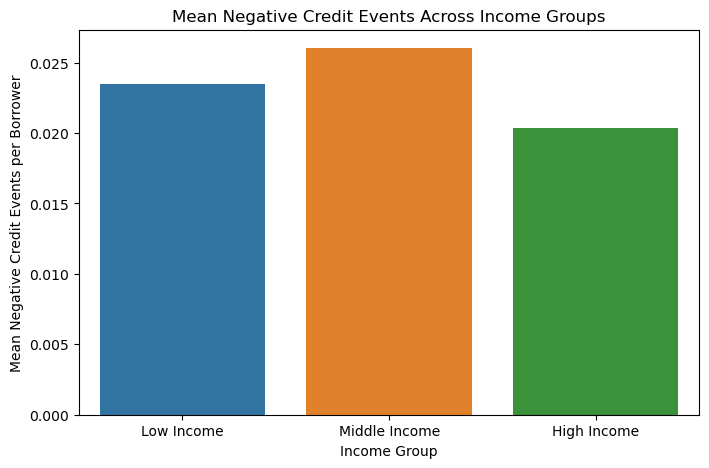

In [406]:
bins = [0, 45000, 250000, float('inf')]
labels = ['Low Income', 'Middle Income', 'High Income']
merged_data['income_group'] = pd.cut(merged_data['annual_inc'], bins=bins, labels=labels, include_lowest=True)
# order for plotting
income_order = ['Low Income', 'Middle Income', 'High Income']
print(merged_data['income_group'].value_counts())

# boxplot for negative credit events across income groups
plt.figure(figsize=(8, 5))
sns.boxplot(x=merged_data['income_group'], y=merged_data['negative_credit_events'], order=income_order)
plt.title('Negative Credit Events Across Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Negative Credit Events')
plt.show()

# bar chart for mean negative credit events
mean_negative_credit_income = merged_data.groupby('income_group')['negative_credit_events'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=income_order, y=[mean_negative_credit_income[i] for i in income_order])
plt.title('Mean Negative Credit Events Across Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Mean Negative Credit Events per Borrower')
plt.show()

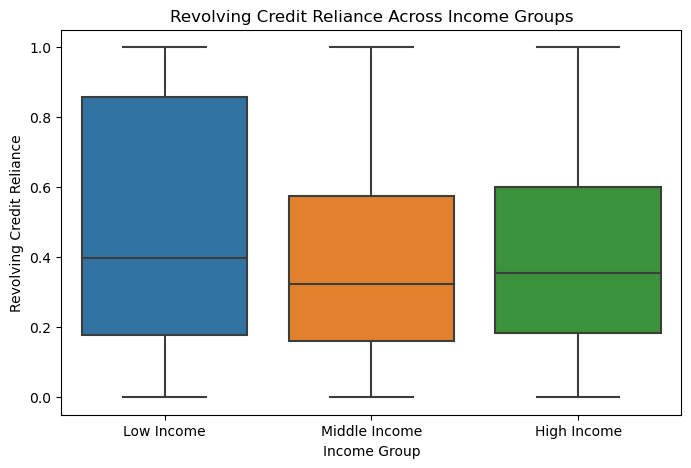

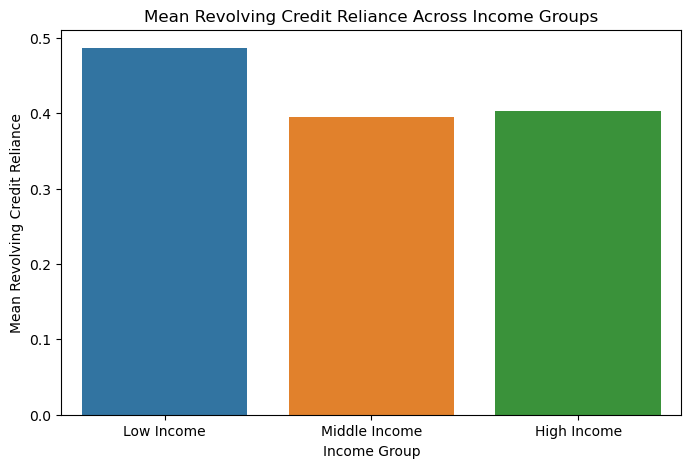

In [407]:
# boxplot for revolving credit reliance across income groups
plt.figure(figsize=(8, 5))
sns.boxplot(x=merged_data['income_group'], y=merged_data['revolving_credit_reliance'], order=income_order)
plt.title('Revolving Credit Reliance Across Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Revolving Credit Reliance')
plt.show()

# bar chart for mean revolving credit reliance
mean_revolving_credit_income = merged_data.groupby('income_group')['revolving_credit_reliance'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=income_order, y=[mean_revolving_credit_income[i] for i in income_order])
plt.title('Mean Revolving Credit Reliance Across Income Groups')
plt.xlabel('Income Group')
plt.ylabel('Mean Revolving Credit Reliance')
plt.show()

In [408]:
summary_stats_income = merged_data.groupby('income_group')[['negative_credit_events', 'revolving_credit_reliance']].describe()
print(summary_stats_income)

              negative_credit_events                                          \
                               count      mean       std  min  25%  50%  75%   
income_group                                                                   
Low Income                   23494.0  0.023453  0.166602  0.0  0.0  0.0  0.0   
Middle Income                74818.0  0.026037  0.182625  0.0  0.0  0.0  0.0   
High Income                   1572.0  0.020356  0.169900  0.0  0.0  0.0  0.0   

                   revolving_credit_reliance                           \
               max                     count      mean       std  min   
income_group                                                            
Low Income     7.0                   23494.0  0.486482  0.349610  0.0   
Middle Income  8.0                   74818.0  0.395103  0.290225  0.0   
High Income    4.0                    1572.0  0.403357  0.273545  0.0   

                                                  
                    25%      

#### U.S. Regions

In [410]:
# regions defined by us census bureau
northeast_states = ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']
midwest_states = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']
south_states = ['AL', 'AR', 'DE', 'DC', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV']
west_states = ['AK', 'AZ', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY']

def region(state):
    if state in northeast_states:
        return "Northeast"
    elif state in midwest_states:
        return "Midwest"
    elif state in south_states:
        return "South"
    elif state in west_states:
        return "West"
region_order = ["Northeast", "Midwest", "South", "West"]

merged_data['region'] = merged_data['addr_state'].apply(region)
print(merged_data['region'].value_counts())

region
South        36446
West         26182
Northeast    19841
Midwest      17415
Name: count, dtype: int64


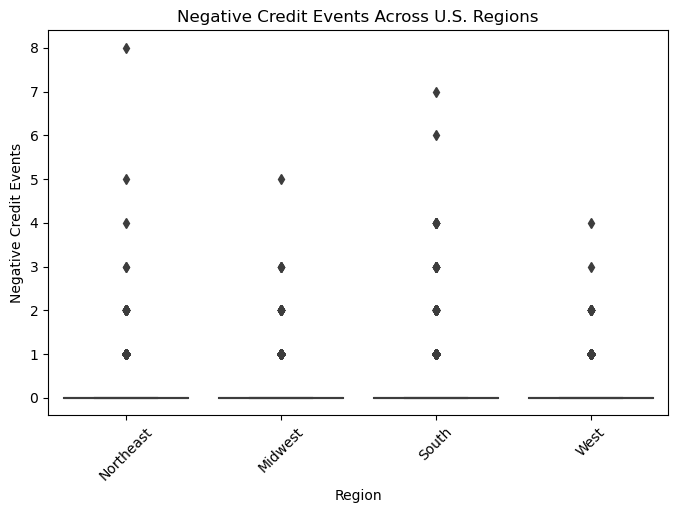

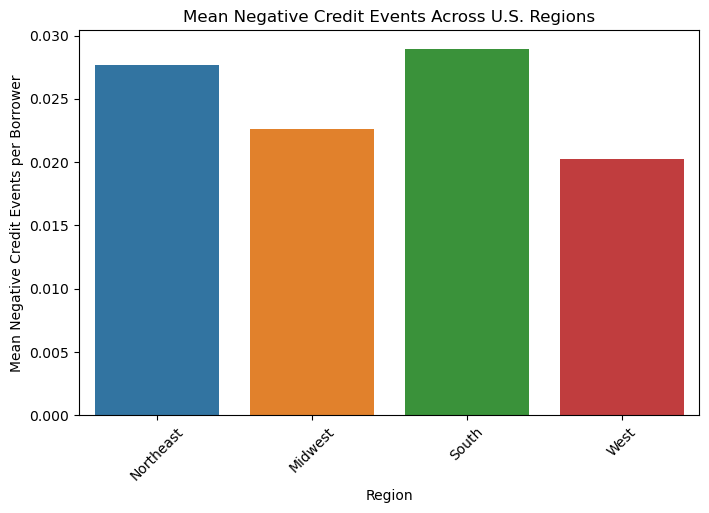

In [411]:
# boxplot for negative credit events by region
plt.figure(figsize=(8, 5))
sns.boxplot(x=merged_data['region'], y=merged_data['negative_credit_events'], order=region_order)
plt.title('Negative Credit Events Across U.S. Regions')
plt.xlabel('Region')
plt.ylabel('Negative Credit Events')
plt.xticks(rotation=45)
plt.show()

# barplot for mean negative credit events by region
mean_negative_credit = merged_data.groupby('region')['negative_credit_events'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_order, y=[mean_negative_credit[region] for region in region_order])
plt.title('Mean Negative Credit Events Across U.S. Regions')
plt.xlabel('Region')
plt.ylabel('Mean Negative Credit Events per Borrower')
plt.xticks(rotation=45)
plt.show()

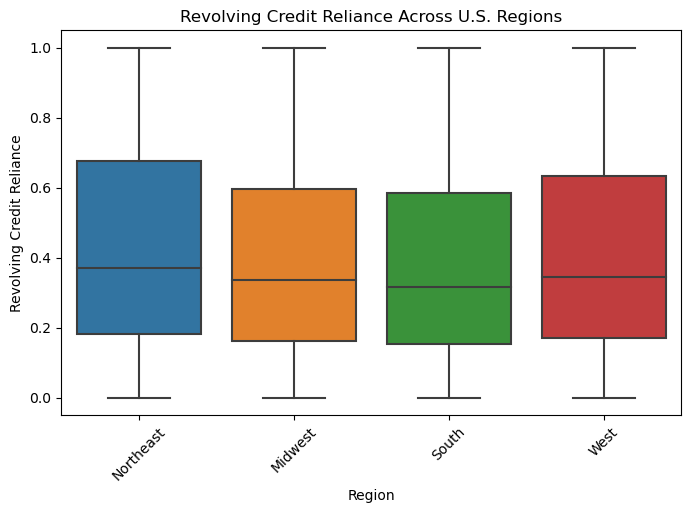

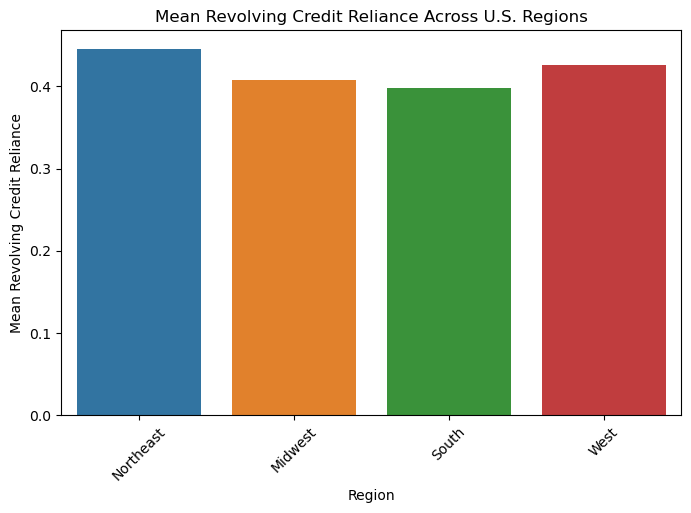

In [412]:
# boxplot for revolving credit reliance by region
plt.figure(figsize=(8, 5))
sns.boxplot(x=merged_data['region'], y=merged_data['revolving_credit_reliance'], order=region_order)
plt.title('Revolving Credit Reliance Across U.S. Regions')
plt.xlabel('Region')
plt.ylabel('Revolving Credit Reliance')
plt.xticks(rotation=45)
plt.show()

# barplot for revolving credit reliance by region
mean_revolving_credit = merged_data.groupby('region')['revolving_credit_reliance'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_order, y=[mean_revolving_credit[region] for region in region_order])
plt.title('Mean Revolving Credit Reliance Across U.S. Regions')
plt.xlabel('Region')
plt.ylabel('Mean Revolving Credit Reliance')
plt.xticks(rotation=45)
plt.show()

In [413]:
summary_stats_region = merged_data.groupby('region')[['negative_credit_events', 'revolving_credit_reliance']].describe()
print(summary_stats_region)

          negative_credit_events                                               \
                           count      mean       std  min  25%  50%  75%  max   
region                                                                          
Midwest                  17415.0  0.022624  0.166212  0.0  0.0  0.0  0.0  5.0   
Northeast                19841.0  0.027720  0.190864  0.0  0.0  0.0  0.0  8.0   
South                    36446.0  0.028974  0.196513  0.0  0.0  0.0  0.0  7.0   
West                     26182.0  0.020281  0.148870  0.0  0.0  0.0  0.0  4.0   

          revolving_credit_reliance                                     \
                              count      mean       std  min       25%   
region                                                                   
Midwest                     17415.0  0.407512  0.298555  0.0  0.163545   
Northeast                   19841.0  0.445897  0.315243  0.0  0.181034   
South                       36446.0  0.398477  0.302959  0.0  

#### Potential Features

In [415]:
# encoding CURRENT_STATUS_LOANX as a binary variable
delinquent_statuses = ['Charged Off', 'Late (31-120 days)']
credit_data_cleaned2['LOANX_Delinquency'] = credit_data_cleaned2['CURRENT_STATUS_LOANX'].apply(lambda x: 1 if x in delinquent_statuses else 0)
credit_data_cleaned2['LOANX_Delinquency'].value_counts()

LOANX_Delinquency
0    99547
1      337
Name: count, dtype: int64

In [416]:
from datetime import datetime

credit_data_cleaned2['earliest_cr_line'] = pd.to_datetime(credit_data_cleaned2['earliest_cr_line'])

# number of months since the earliest credit line
current_date = datetime.today()
credit_data_cleaned2['mths_since_earliest_cr_line'] = ((current_date.year - credit_data_cleaned2['earliest_cr_line'].dt.year) * 12
                                                       + (current_date.month - credit_data_cleaned2['earliest_cr_line'].dt.month))

In [417]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# features and target variable
# exclude non-numerical values and variables not originally in credit data
X_features = credit_data_cleaned2.drop(columns=['ID', 'CURRENT_STATUS_LOANX', 'LOANX_Delinquency', "earliest_cr_line", 
                                                'revolving_credit_reliance', 'negative_credit_events'])
                                                #'mths_since_last_delinq_missing', 'mths_since_last_major_derog_missing']).copy()
y_target = credit_data_cleaned2['LOANX_Delinquency'].copy()  # Binary target variable

# feature scaling using standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.2, random_state=42)

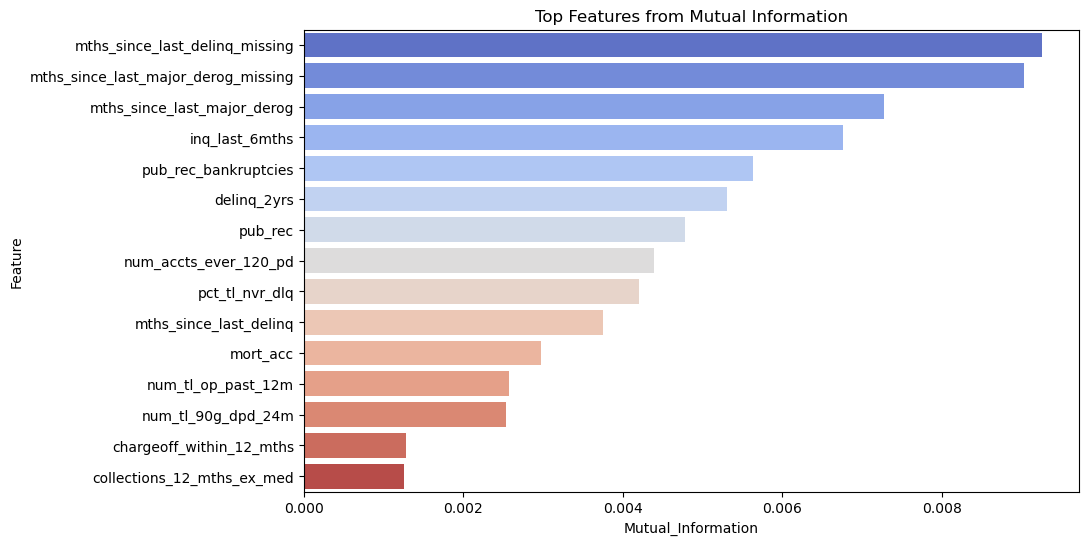

In [418]:
# mutual information 
mi_scores = mutual_info_classif(X_train, y_train)
mi_feature_importance = pd.DataFrame({'Feature': X_features.columns, 'Mutual_Information': mi_scores})
mi_feature_importance = mi_feature_importance.sort_values(by='Mutual_Information', ascending=False)

# top features from mutual info
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual_Information', y='Feature', data=mi_feature_importance.head(15), palette='coolwarm')
plt.title('Top Features from Mutual Information')
plt.show()

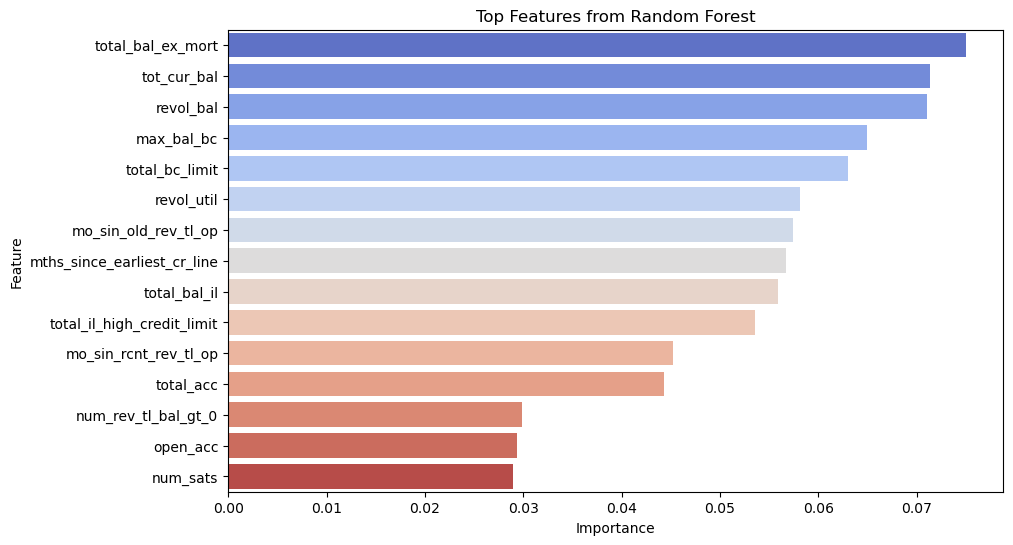

In [419]:
# feature importance using random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importance_rf = pd.DataFrame({'Feature': X_features.columns, 'Importance': rf.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# top features from random forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf.head(15), palette='coolwarm')
plt.title('Top Features from Random Forest')
plt.show()

Selected Features using L1 Regularization:
                                Feature  Coefficient
15                          delinq_amnt    -2.346624
12                         total_bal_il     1.152584
29                    total_bal_ex_mort    -0.981319
4                               pub_rec    -0.688531
2                mths_since_last_delinq    -0.681163
27                 pub_rec_bankruptcies     0.628600
32       mths_since_last_delinq_missing     0.529357
31           total_il_high_credit_limit    -0.427001
5                             revol_bal     0.398378
1                        inq_last_6mths     0.297652
3                              open_acc    -0.277769
6                            revol_util    -0.179179
18                             mort_acc    -0.162001
7                             total_acc    -0.149659
25                   num_tl_op_past_12m     0.146905
21                             num_sats     0.123762
33  mths_since_last_major_derog_missing    -0.112774
26 

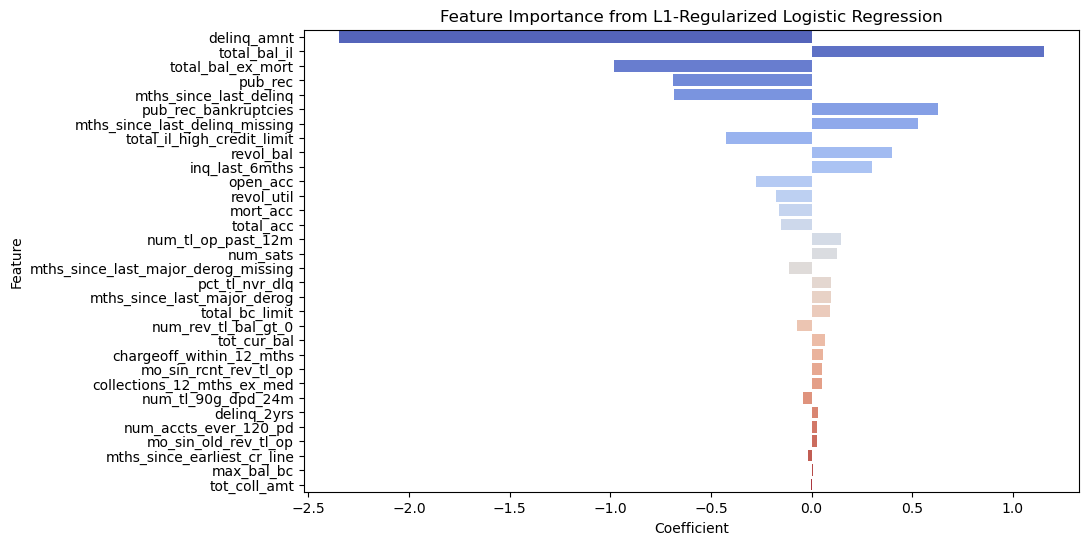

In [421]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# l1-regularized logistic regression
log_reg = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000)

param_dist = {'C': np.logspace(-4, 4, 10)} # hyper parameter grid
random_search = RandomizedSearchCV(log_reg, param_distributions=param_dist, n_iter=5, cv=3, scoring='f1', random_state=42)
random_search.fit(X_train, y_train)
best_log_reg = random_search.best_estimator_ #best model

# feature coefficients
feature_importance = pd.DataFrame({'Feature': X_features.columns,'Coefficient': best_log_reg.coef_[0]})

# remove features with zero coefficients and sort
selected_features = feature_importance[feature_importance['Coefficient'] != 0]
selected_features = selected_features.reindex(selected_features['Coefficient'].abs().sort_values(ascending=False).index)
# plot importance
print("Selected Features using L1 Regularization:")
print(selected_features)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=selected_features, palette='coolwarm')
plt.title("Feature Importance from L1-Regularized Logistic Regression")
plt.show()

#### Creating new features

In [423]:
transformed_data = credit_data_cleaned2.copy()

# ratio of installment loan utilization
transformed_data['installment_util'] = transformed_data.apply(
    lambda row: 1.0 if row['total_il_high_credit_limit'] == 0 and row['total_bal_il'] > 0 
    else 0.0 if row['total_il_high_credit_limit'] == 0 and row['total_bal_il'] == 0
    else row['total_bal_il'] / row['total_il_high_credit_limit'], axis=1
)

# diversity of credit line
transformed_data['credit_line_diversity'] = transformed_data['open_acc'] / transformed_data['total_acc']

# revolving credit reliance already calculated in part 2

#### Transformations, encoding, and binning techniques

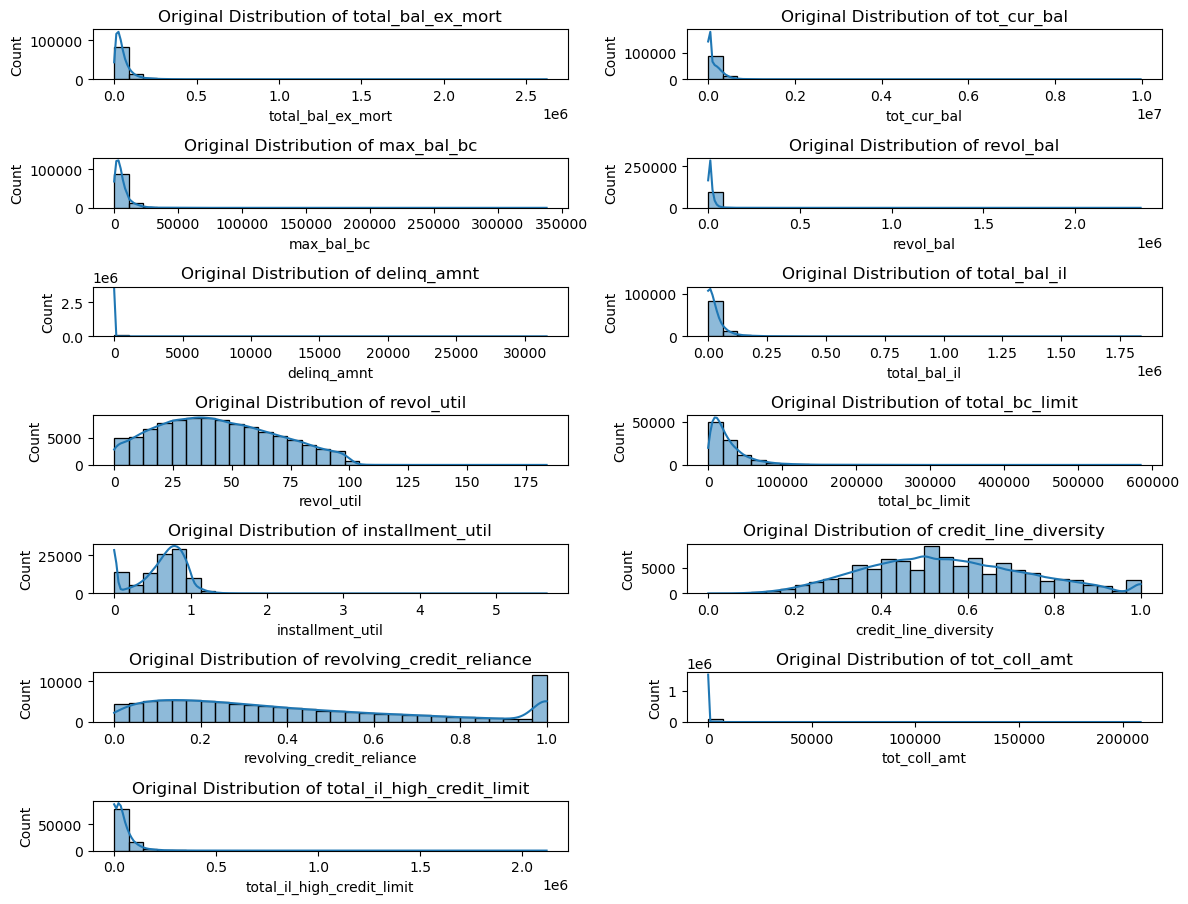

In [425]:
# check skewness of these variables, to confirm log transformation requirement
features_to_plot = ['total_bal_ex_mort', 'tot_cur_bal', 'max_bal_bc', 'revol_bal', 'delinq_amnt', 'total_bal_il', 
                    'revol_util', 'total_bc_limit', 
                    'installment_util', 'credit_line_diversity', 'revolving_credit_reliance',
                   'tot_coll_amt', 'total_il_high_credit_limit'] # added features

plt.figure(figsize=(12, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(8, 2, i)
    sns.histplot(transformed_data[feature], kde=True, bins=30)
    plt.title(f'Original Distribution of {feature}')
plt.tight_layout()
plt.show()

Log Transformation and Square Root Transformation for revolving_credit_reliance

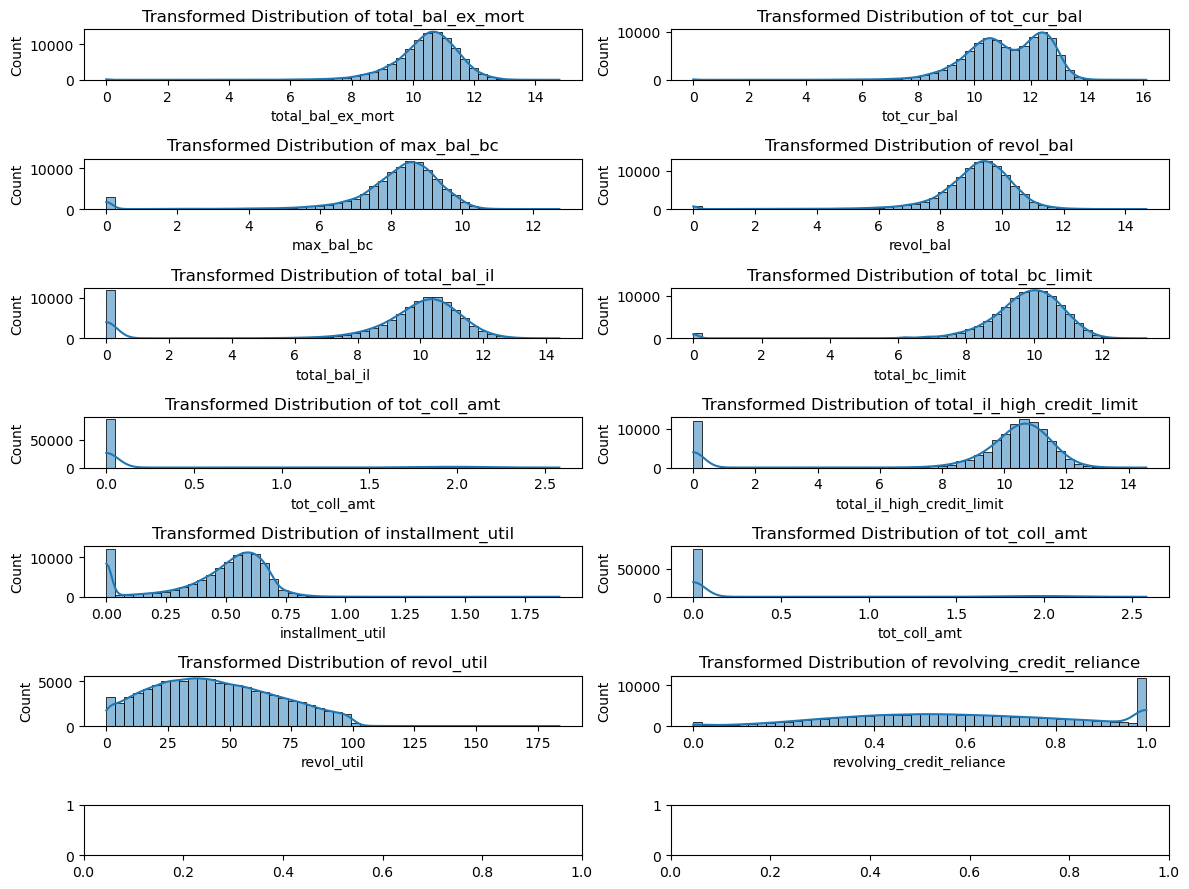

In [427]:
# excluding revol_util (has a good distribution)
log_transform_features = ['total_bal_ex_mort', 'tot_cur_bal', 'max_bal_bc', 'revol_bal','total_bal_il', 'total_bc_limit',
                         'tot_coll_amt', 'total_il_high_credit_limit', 'installment_util', 'tot_coll_amt']

# log transform
for feature in log_transform_features:
    transformed_data[feature] = np.log1p(transformed_data[feature])

# sqrt transformation
transformed_data['revolving_credit_reliance'] = np.sqrt(transformed_data['revolving_credit_reliance'])

# plot transformed distributions
fig, axes = plt.subplots(7, 2, figsize=(12, 9))
axes = axes.flatten()
for i, feature in enumerate(log_transform_features + ['revol_util', 'revolving_credit_reliance']):
    sns.histplot(transformed_data[feature], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Transformed Distribution of {feature}")
plt.tight_layout()
plt.show()

Binning

In [429]:
# binning months since last major derogatory into categories
transformed_data['mths_since_last_major_derog_bin'] = pd.cut(transformed_data['mths_since_last_major_derog'], 
                                                               bins=[-1, 0, 24, 60, 120, np.inf], 
                                                               labels=['No Derog', '<2 years', '2-5 years', '5-10 years', '10+ years'])
# binning months since last delinquency
transformed_data['mths_since_last_delinq_bin'] = pd.cut(transformed_data['mths_since_last_delinq'], 
                                                          bins=[-1, 0, 24, 60, 120, np.inf], 
                                                          labels=['No Delinq', '<2 years', '2-5 years', '5-10 years', '10+ years'])
# binning months since earliest credit line
transformed_data['mths_since_earliest_cr_line_bin'] = pd.cut(transformed_data['mths_since_earliest_cr_line'], 
                                                             bins=[-1, 60, 120, 180, 240, np.inf], 
                                                             labels=['<5 years', '5-10 years', '10-15 years', '15-20 years', '20+ years'])
# binning delinq amount
transformed_data['delinq_amnt_bin'] = pd.cut(transformed_data['delinq_amnt'], 
                                             bins=[-1, 0, 1000, 5000, np.inf], 
                                             labels=['No Delinq', 'Low', 'Moderate', 'High'])

Standardization for Continuous Variables

In [431]:
continuous_features = ['total_bal_ex_mort', 'tot_cur_bal', 'max_bal_bc', 'revol_bal', 'total_bal_il', 
                       'total_bc_limit', 'delinq_amnt', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies', 
                       'revol_util', 'num_sats', 'num_tl_op_past_12m', 'total_il_high_credit_limit', 'delinq_2yrs', 
                       'open_acc', 'mo_sin_old_rev_tl_op', 
                       'installment_util', 'credit_line_diversity', 'revolving_credit_reliance'] # engineered features
scaler = StandardScaler()
transformed_data[continuous_features] = scaler.fit_transform(transformed_data[continuous_features])

One-Hot Encoding for Binned Variables

In [433]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_vars = encoder.fit_transform(transformed_data[['mths_since_last_major_derog_bin', 'mths_since_last_delinq_bin',
                                                       'mths_since_earliest_cr_line_bin', 'delinq_amnt_bin']])
encoded_var_names = encoder.get_feature_names_out(['mths_since_last_major_derog_bin', 'mths_since_last_delinq_bin', 
                                                   'mths_since_earliest_cr_line_bin', 'delinq_amnt_bin'])

encoded_df = pd.DataFrame(encoded_vars, columns=encoded_var_names, index=transformed_data.index)
#transformed_data = pd.concat([transformed_data.drop(columns=['mths_since_last_major_derog_bin', 'mths_since_last_delinq_bin',
#                                                          'mths_since_earliest_cr_line_bin', 'delinq_amnt_bin']), encoded_df], axis=1)

transformed_data = pd.concat([transformed_data, encoded_df], axis=1)

In [434]:
missing_value_flags = ['mths_since_last_major_derog_missing', 'mths_since_last_delinq_missing', ]
target = ['LOANX_Delinquency']
transformed_data = transformed_data[continuous_features + list(encoded_df.columns) + missing_value_flags + target]

Dropping highly correlated features before model training

In [444]:
# correlation matrix
correlation_matrix = transformed_data.corr()
high_corr_threshold = 0.7

# pairs of highly correlated features
high_corr_pairs = [(col1, col2, correlation_matrix.loc[col1, col2]) for col1 in correlation_matrix.columns 
                   for col2 in correlation_matrix.columns 
                   if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > high_corr_threshold]

# remove duplicate pairs
high_corr_pairs = set(tuple(sorted(pair[:2])) + (pair[2],) for pair in high_corr_pairs)
# print pairs
print("Highly Correlated Feature Pairs (Threshold = {:.2f}):".format(high_corr_threshold))
for col1, col2, corr_value in high_corr_pairs:
    print(f"{col1} - {col2}: {corr_value:.3f}")

Highly Correlated Feature Pairs (Threshold = 0.70):
installment_util - total_bal_il: 0.865
num_sats - open_acc: 1.000
installment_util - revolving_credit_reliance: -0.708
mths_since_earliest_cr_line_bin_15-20 years - mths_since_earliest_cr_line_bin_20+ years: -0.718
delinq_2yrs - mths_since_last_delinq_bin_<2 years: 0.714
tot_cur_bal - total_bal_ex_mort: 0.706
installment_util - total_il_high_credit_limit: 0.805
total_bal_il - total_il_high_credit_limit: 0.991
pub_rec - pub_rec_bankruptcies: 0.999
max_bal_bc - revol_bal: 0.724


In [447]:
transformed_data_original = transformed_data.copy() # preserving old transformed data in case of future use
transformed_data = transformed_data.copy() # done due to prevent SettingWithCopyWarning  

# features to drop
features_to_drop = ['num_sats', 'pub_rec_bankruptcies', 'total_bal_il']
transformed_data.drop(columns=features_to_drop, inplace=True)

# new feature combining delinquency indicators safely
transformed_data.loc[:, 'recent_delinquency_score'] = ((transformed_data['delinq_2yrs'] > 0).astype(int) +
                                                       transformed_data['mths_since_last_delinq_bin_<2 years'].astype(int))
transformed_data.drop(columns=['delinq_2yrs', 'mths_since_last_delinq_bin_<2 years'], inplace=True)
print(transformed_data.columns)

Index(['total_bal_ex_mort', 'tot_cur_bal', 'max_bal_bc', 'revol_bal',
       'total_bc_limit', 'delinq_amnt', 'inq_last_6mths', 'pub_rec',
       'revol_util', 'num_tl_op_past_12m', 'total_il_high_credit_limit',
       'open_acc', 'mo_sin_old_rev_tl_op', 'installment_util',
       'credit_line_diversity', 'revolving_credit_reliance',
       'mths_since_last_major_derog_bin_2-5 years',
       'mths_since_last_major_derog_bin_5-10 years',
       'mths_since_last_major_derog_bin_<2 years',
       'mths_since_last_major_derog_bin_No Derog',
       'mths_since_last_delinq_bin_2-5 years',
       'mths_since_last_delinq_bin_5-10 years',
       'mths_since_last_delinq_bin_No Delinq',
       'mths_since_earliest_cr_line_bin_15-20 years',
       'mths_since_earliest_cr_line_bin_20+ years',
       'mths_since_earliest_cr_line_bin_5-10 years', 'delinq_amnt_bin_Low',
       'delinq_amnt_bin_Moderate', 'delinq_amnt_bin_No Delinq',
       'mths_since_last_major_derog_missing', 'mths_since_last_delinq

#### Predictive Modeling

In [457]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve

In [458]:
transformed_data['LOANX_Delinquency'].value_counts()

LOANX_Delinquency
0    99547
1      337
Name: count, dtype: int64

In [479]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

# features and target variable
X = transformed_data.drop(columns=['LOANX_Delinquency'])  
y = transformed_data['LOANX_Delinquency']  

# 80-20 split
X_train, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# SMOTE + Tomek Links
# apply tomek links (removes borderline majority cases)
tomek = TomekLinks(sampling_strategy='auto')
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

# apply smote (synthetically generates more "delinquent" cases)
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tomek, y_train_tomek)

#  new class distribution
print("Class distribution after Tomek Links + SMOTE:\n", y_train_balanced.value_counts())

# scaling
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test_unscaled) # preserve unscaled for Q5

Class distribution after Tomek Links + SMOTE:
 LOANX_Delinquency
0    79537
1    39768
Name: count, dtype: int64


#### Train and Evaluate Model 1 - Decision Tree

Training

In [484]:
# decision tree on both datasets
dt_param_grid = {'max_depth': [4, 5, 6, 7, 8],
                 'min_samples_split': [2, 5, 10, 15],
                 'min_samples_leaf': [1, 2, 5, 10],
                 'class_weight': ['balanced'],}

dt_search_unbalanced = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, scoring='roc_auc', cv=5, n_iter=10, random_state=42, n_jobs=-1)
dt_search_balanced = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, scoring='roc_auc', cv=5, n_iter=10, random_state=42, n_jobs=-1)

dt_search_unbalanced.fit(X_train, y_train)
dt_search_balanced.fit(X_train_balanced, y_train_balanced)

best_dt_unbalanced = dt_search_unbalanced.best_estimator_
best_dt_balanced = dt_search_balanced.best_estimator_

print("Best Hyperparameters for Decision Tree (Unbalanced):", dt_search_unbalanced.best_params_)
print("Best Hyperparameters for Decision Tree (Balanced):", dt_search_balanced.best_params_)

Best Hyperparameters for Decision Tree (Unbalanced): {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 4, 'class_weight': 'balanced'}
Best Hyperparameters for Decision Tree (Balanced): {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 8, 'class_weight': 'balanced'}


Evaluation

/Users/sheetalsudhir/.local/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/Users/sheetalsudhir/.local/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



Optimized Decision Tree AUC-ROC Score (Unbalanced): 0.6154737362909212
Optimized Decision Tree AUC-ROC Score (Balanced): 0.4680408854771846

Decision Tree (Unbalanced) - Precision: 0.0046, Recall: 0.6119, F1-score: 0.0091
Decision Tree (Balanced) - Precision: 0.0037, Recall: 0.0597, F1-score: 0.0070

Classification Report (Unbalanced):
               precision    recall  f1-score   support

           0       1.00      0.55      0.71     19910
           1       0.00      0.61      0.01        67

    accuracy                           0.56     19977
   macro avg       0.50      0.58      0.36     19977
weighted avg       0.99      0.56      0.71     19977


Classification Report (Balanced):
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     19910
           1       0.00      0.06      0.01        67

    accuracy                           0.94     19977
   macro avg       0.50      0.50      0.49     19977
weighted avg       0.99   

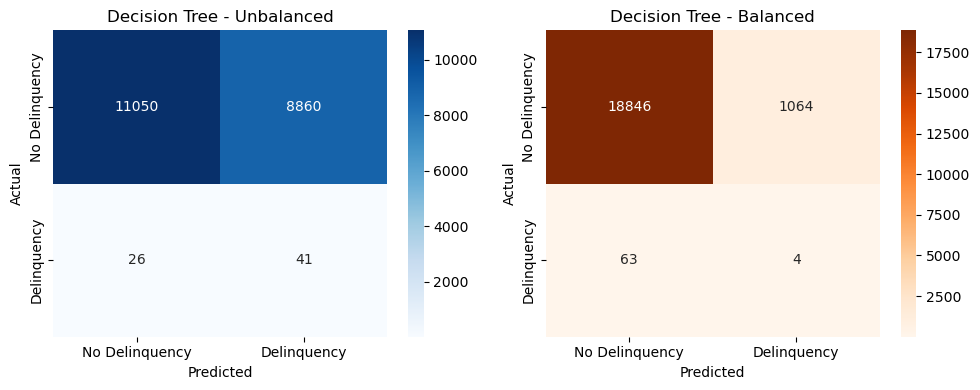

In [486]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

# predictions
y_pred_dt_unbalanced = best_dt_unbalanced.predict(X_test)
y_pred_proba_dt_unbalanced = best_dt_unbalanced.predict_proba(X_test)[:, 1]

y_pred_dt_balanced = best_dt_balanced.predict(X_test)
y_pred_proba_dt_balanced = best_dt_balanced.predict_proba(X_test)[:, 1]

# AUC-ROC Scores
auc_dt_unbalanced = roc_auc_score(y_test, y_pred_proba_dt_unbalanced)
auc_dt_balanced = roc_auc_score(y_test, y_pred_proba_dt_balanced)

print("Optimized Decision Tree AUC-ROC Score (Unbalanced):", auc_dt_unbalanced)
print("Optimized Decision Tree AUC-ROC Score (Balanced):", auc_dt_balanced)

# metrics for both models
precision_unb, recall_unb, f1_unb, _ = precision_recall_fscore_support(y_test, y_pred_dt_unbalanced, average='binary')
precision_bal, recall_bal, f1_bal, _ = precision_recall_fscore_support(y_test, y_pred_dt_balanced, average='binary')

print("\nDecision Tree (Unbalanced) - Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(precision_unb, recall_unb, f1_unb))
print("Decision Tree (Balanced) - Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(precision_bal, recall_bal, f1_bal))

# classif. reports
print("\nClassification Report (Unbalanced):\n", classification_report(y_test, y_pred_dt_unbalanced))
print("\nClassification Report (Balanced):\n", classification_report(y_test, y_pred_dt_balanced))

# confusion matrix
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_dt_unbalanced), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Delinquency', 'Delinquency'], yticklabels=['No Delinquency', 'Delinquency'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Unbalanced")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_dt_balanced), annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Delinquency', 'Delinquency'], yticklabels=['No Delinquency', 'Delinquency'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Balanced")

plt.tight_layout()
plt.show()

#### Train and Evaluate Model 2 - Logistic Regression

Training and Evaluation on Unbalanced Data

Best Hyperparameters for Logistic Regression (Unbalanced): {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.021544346900318832}
Optimized Logistic Regression AUC-ROC Score (Unbalanced): 0.5679947824913603
Logistic Regression Classification Report (Unbalanced):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     19910
           1       0.01      0.03      0.02        67

    accuracy                           0.99     19977
   macro avg       0.51      0.51      0.51     19977
weighted avg       0.99      0.99      0.99     19977



/Users/sheetalsudhir/.local/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/Users/sheetalsudhir/.local/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



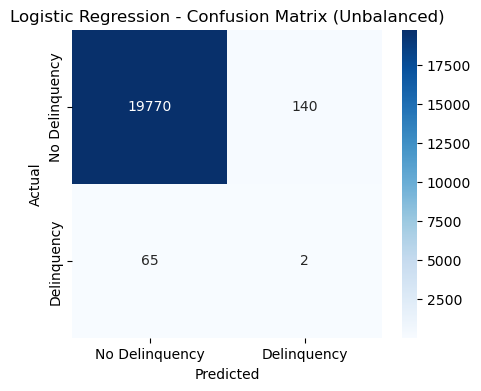

In [489]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

log_reg = LogisticRegression(max_iter=1000, random_state=42)

# hyperparameter grid
log_reg_param_grid = {'C': np.logspace(-3, 3, 10),'penalty': ['l1', 'l2'],  'solver': ['liblinear']}

# randomized search, 3fold cv
log_reg_search_unbalanced = RandomizedSearchCV(log_reg, log_reg_param_grid, scoring='roc_auc', cv=3, n_iter=7, random_state=42, n_jobs=-1)
log_reg_search_unbalanced.fit(X_train, y_train)

best_log_reg_unbalanced = log_reg_search_unbalanced.best_estimator_
print("Best Hyperparameters for Logistic Regression (Unbalanced):", log_reg_search_unbalanced.best_params_)

# pred. and eval.
y_pred_proba_log_unbalanced = best_log_reg_unbalanced.predict_proba(X_test)[:, 1]
y_pred_log_unbalanced = best_log_reg_unbalanced.predict(X_test)

auc_log_unbalanced = roc_auc_score(y_test, y_pred_proba_log_unbalanced)
print("Optimized Logistic Regression AUC-ROC Score (Unbalanced):", auc_log_unbalanced)

# performance metrics
print("Logistic Regression Classification Report (Unbalanced):\n", classification_report(y_test, y_pred_log_unbalanced))

# confusion matrix 
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log_unbalanced), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Delinquency', 'Delinquency'], yticklabels=['No Delinquency', 'Delinquency'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix (Unbalanced)")
plt.show()


Training and Evaluation on Balanced Data

Best Hyperparameters for Logistic Regression (Balanced): {'solver': 'liblinear', 'penalty': 'l2', 'C': 215.44346900318823}
Optimized Logistic Regression AUC-ROC Score (Balanced): 0.550408929736051
Logistic Regression Classification Report (Balanced):
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     19910
           1       0.01      0.10      0.02        67

    accuracy                           0.96     19977
   macro avg       0.50      0.53      0.50     19977
weighted avg       0.99      0.96      0.98     19977



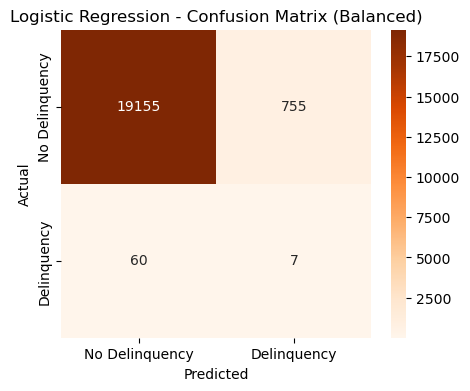

In [491]:
# randomized search, 3fold cv
log_reg_search_balanced = RandomizedSearchCV(
    log_reg, log_reg_param_grid, scoring='roc_auc', cv=3, n_iter=7, random_state=42, n_jobs=-1
)
log_reg_search_balanced.fit(X_train_balanced, y_train_balanced)

best_log_reg_balanced = log_reg_search_balanced.best_estimator_
print("Best Hyperparameters for Logistic Regression (Balanced):", log_reg_search_balanced.best_params_)

# pred. and eval
y_pred_proba_log_balanced = best_log_reg_balanced.predict_proba(X_test)[:, 1]
y_pred_log_balanced = best_log_reg_balanced.predict(X_test)

auc_log_balanced = roc_auc_score(y_test, y_pred_proba_log_balanced)
print("Optimized Logistic Regression AUC-ROC Score (Balanced):", auc_log_balanced)

# perform. metrics
print("Logistic Regression Classification Report (Balanced):\n", classification_report(y_test, y_pred_log_balanced))

# confusion matrix 
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log_balanced), annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Delinquency', 'Delinquency'], yticklabels=['No Delinquency', 'Delinquency'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix (Balanced)")
plt.show()


#### Key features impacting delinquency predictions

Decision tree feature importance

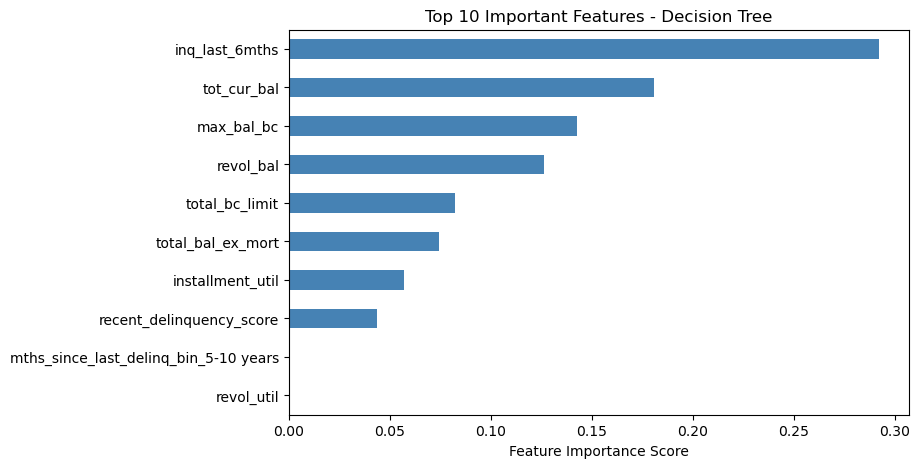

In [494]:
# feature importance from decision tree
dt_feature_importance = pd.Series(best_dt_unbalanced.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
dt_feature_importance[:10].plot(kind='barh', color='steelblue')
plt.title("Top 10 Important Features - Decision Tree")
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()
plt.show()

Logistic regression coefficients

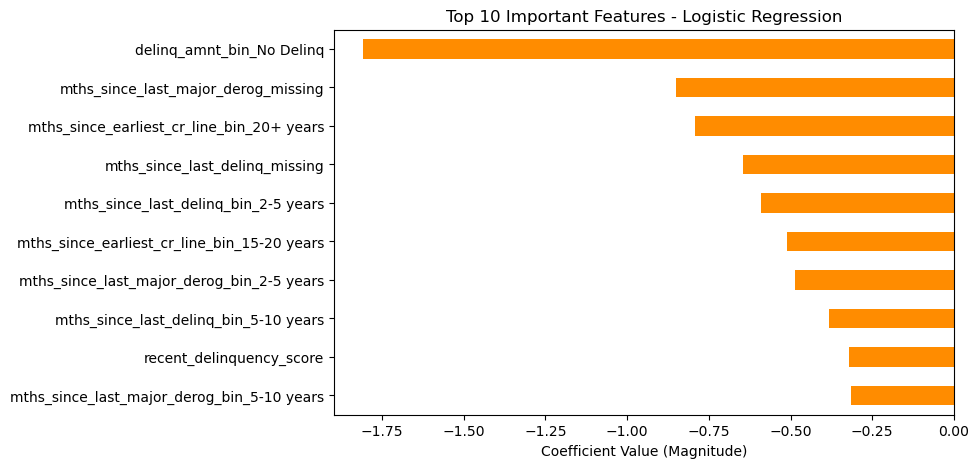

In [496]:
log_reg_coefficients = pd.Series(best_log_reg_unbalanced.coef_[0], index=X_train.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(8, 5))
log_reg_coefficients[:10].plot(kind='barh', color='darkorange')
plt.title("Top 10 Important Features - Logistic Regression")
plt.xlabel("Coefficient Value (Magnitude)")
plt.gca().invert_yaxis()
plt.show()


SHAP values

<Figure size 640x480 with 0 Axes>

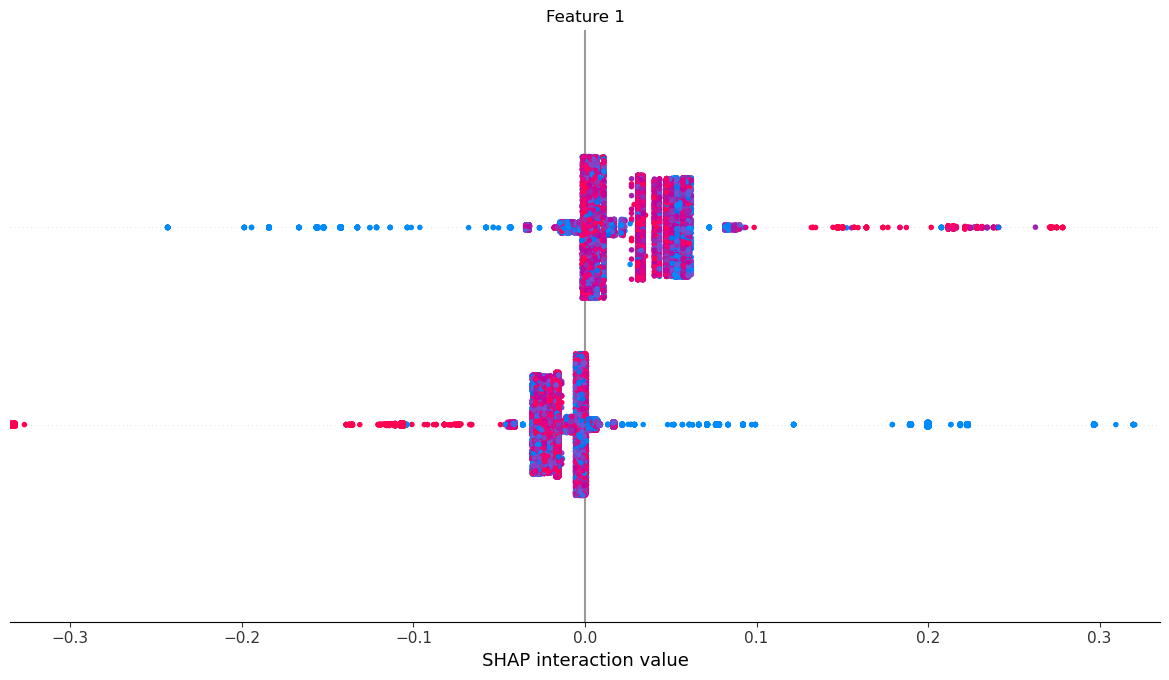

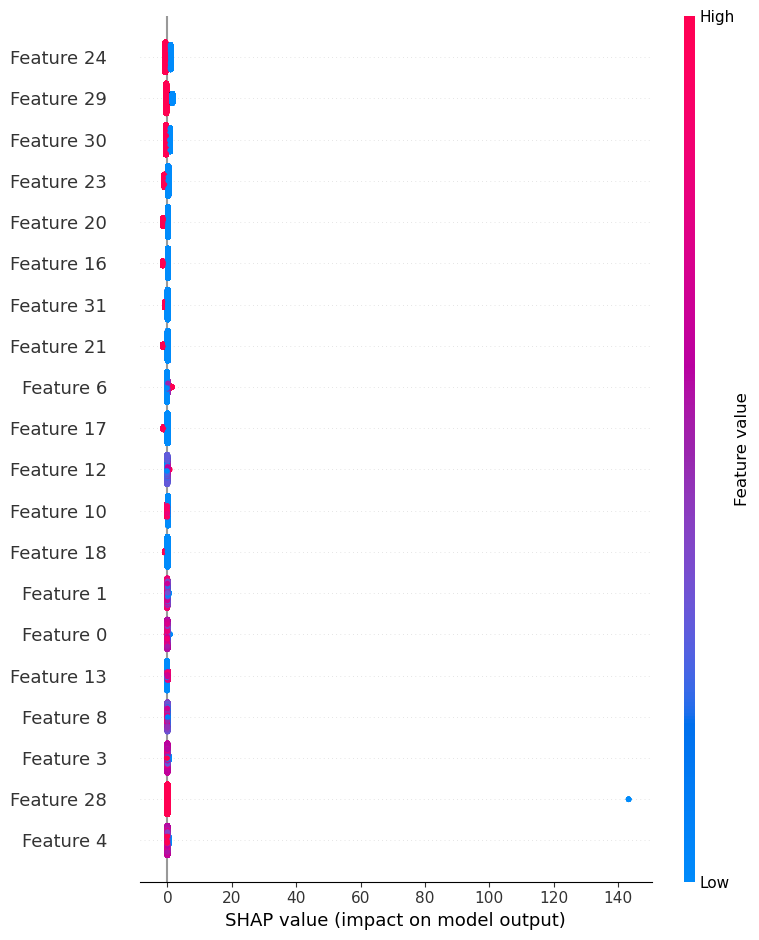

In [497]:
import shap

# SHAP value for decision tree
explainer_dt = shap.TreeExplainer(best_dt_unbalanced)
shap_values_dt = explainer_dt.shap_values(X_test)

# SHAP values for log. regression
explainer_log_reg = shap.Explainer(best_log_reg_unbalanced, X_test)
shap_values_log_reg = explainer_log_reg(X_test)

# plot for deicison tree
shap.summary_plot(shap_values_dt, X_test, plot_type="bar")

# plot for log. regression
shap.summary_plot(shap_values_log_reg, X_test)

#### Assessing model fairness with demographic data

In [518]:
# original X_test before scaling
X_test_unscaled_ind = transformed_data.loc[X_test_unscaled.index] 

In [522]:
df1 = X_test_unscaled_ind.copy()
df2 = merged_data.copy()

In [542]:
# keep index consistency
demographic_data = df1.merge(df2[['emp_length', 'home_ownership', 'annual_inc', 'addr_state']],
                                             left_index=True, right_index=True, how='left')
# model predictions to demographic data
demographic_data['pred_decision_tree'] = y_pred_dt_unbalanced
demographic_data['pred_logistic_reg'] = y_pred_log_unbalanced
demographic_data['actual'] = y_test

# calculate fairness metrics per group
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# locate the correct actual value by tracking with index 
def fairness_metrics(df, group_col, pred_col, actual_col):
    grouped = df.groupby(group_col).agg(accuracy=(pred_col, lambda x: accuracy_score(df.loc[x.index, actual_col], x)),
                                        precision=(pred_col, lambda x: precision_score(df.loc[x.index, actual_col], x, zero_division=0)),
                                        recall=(pred_col, lambda x: recall_score(df.loc[x.index, actual_col], x, zero_division=0)),
                                        f1_score=(pred_col, lambda x: f1_score(df.loc[x.index, actual_col], x, zero_division=0)))
    return grouped

# evaluation across different demographic groups
home_ownership_fairness_dt = fairness_metrics(demographic_data, 'home_ownership', 'pred_decision_tree', 'actual')
home_ownership_fairness_log = fairness_metrics(demographic_data, 'home_ownership', 'pred_logistic_reg', 'actual')

emp_length_fairness_dt = fairness_metrics(demographic_data, 'emp_length', 'pred_decision_tree', 'actual')
emp_length_fairness_log = fairness_metrics(demographic_data, 'emp_length', 'pred_logistic_reg', 'actual')

annual_inc_fairness_dt = fairness_metrics(demographic_data, 'annual_inc', 'pred_decision_tree', 'actual')
annual_inc_fairness_log = fairness_metrics(demographic_data, 'annual_inc', 'pred_logistic_reg', 'actual')

In [546]:
print("Decision Tree - Fairness Evaluation by Home Ownership:\n", home_ownership_fairness_dt)
print("\nLogistic Regression - Fairness Evaluation by Home Ownership:\n", home_ownership_fairness_log)

print("\nDecision Tree - Fairness Evaluation by Employment Length:\n", emp_length_fairness_dt)
print("\nLogistic Regression - Fairness Evaluation by Employment Length:\n", emp_length_fairness_log)

print("\nDecision Tree - Fairness Evaluation by Annual Income:\n", annual_inc_fairness_dt)
print("\nLogistic Regression - Fairness Evaluation by Annual Income:\n", annual_inc_fairness_dt)

Decision Tree - Fairness Evaluation by Home Ownership:
                 accuracy  precision    recall  f1_score
home_ownership                                         
ANY             0.641509   0.000000  0.000000  0.000000
MORTGAGE        0.555319   0.004561  0.555556  0.009048
OWN             0.549089   0.001974  0.333333  0.003925
RENT            0.556225   0.005468  0.791667  0.010860

Logistic Regression - Fairness Evaluation by Home Ownership:
                 accuracy  precision    recall  f1_score
home_ownership                                         
ANY             0.981132   0.000000  0.000000  0.000000
MORTGAGE        0.989647   0.028571  0.055556  0.037736
OWN             0.990671   0.000000  0.000000  0.000000
RENT            0.989614   0.000000  0.000000  0.000000

Decision Tree - Fairness Evaluation by Employment Length:
             accuracy  precision    recall  f1_score
emp_length                                         
1 year      0.553595   0.007289  0.714286  0.